**Notebook developed by:** Shreya Milind Athalye

**Editor:** David M Umulis

**Subject:** ABE69100_Quantitaive Systems Biology

**Project:** Jupyter Notebook for the boolean model of gene network's topology in *Drosophila melanogaster*.

**Deliverables:**
There are 8 tasks in this notebook that will lead user through the development of boolean model for segment polarity genes in *Drosophila melanogaster* . This model will help user to predict the expression patterns of this gene network for different cases of mutations and ectopic patterns. 


**The topology of the network for the gene expression in *Drosophila melanogaster***

**Introduction:** 

Imagine that you are solving a jigsaw puzzle. Each piece of the jigsaw puzzle has a unique shape/characteristics and is only fitted with the one right piece. The picture is complete if all the jigsaw pieces are in place. Similarly, in biology to activate a gene (suppose, x) and its translation into the protein (suppose, X) requires pre-activation of certain set of genes that regulate the gene of our interest. In order to get a bigger picture, it is important to understand the topology of this gene network. In other words, we need to understand the patterns involved in the gene regulation. 

Many researchers have tried to map this pattern of gene regulation, mainly with two approaches: Discrete-state approach and Continuous-state approach. The discrete-state approach considered a small number of discrete states for each gene or protein, and described how gene products interact to determine the state next time, gives rise to a discrete dynamical system[1]–[4]. In the continuous-state approach, the genes are considered a continuous function of time, and the model uses differential equations for the production and decay of all components[5]–[7]. Von Dassow et al. proposed a first model that focused on the segment polarity gene network, which provided evidence that the changes in reaction parameters highlight the importance of the segment polarity network's topology[5], [8].

R. Albert and H.G. Othmer proposed a Boolean model for the segment polarity gene network that represent transcription and translation levels in binary ON/OFF form[9]. In this study, the authors developed a topology network from previously studied gene interactions, which provided a basis for modeling the segment polarity gene network. Each node of the network represents mRNA or protein, and the arrows represent interactions between them (see Figure 1).


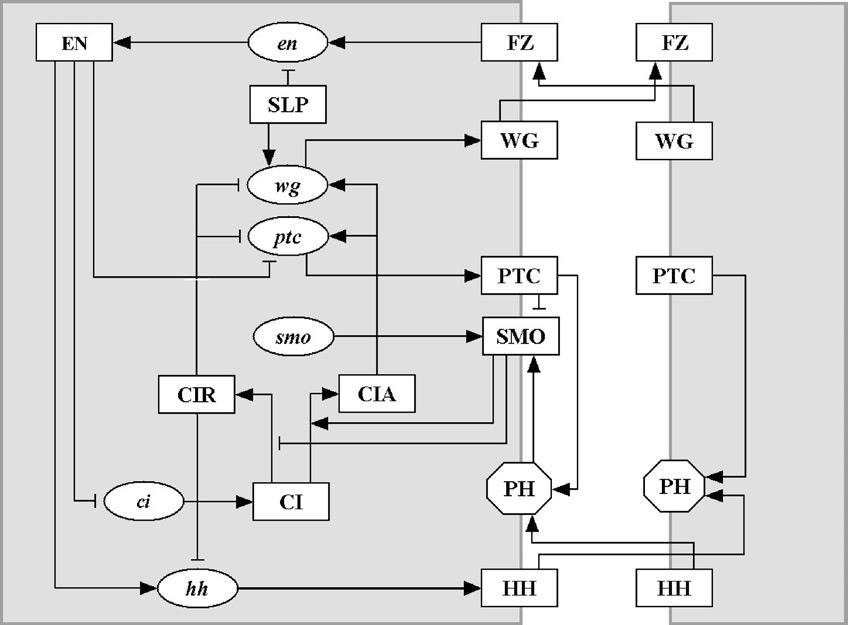

Figure 1. The network of interactions between the segment polarity genes. The shape of the nodes indicates whether the corresponding substances are mRNAs (ellipses), proteins (rectangles), or protein complexes (octagons). The edges are distinguished by their signatures, i.e., whether they are activating (Terminating arrows (→) )or inhibiting (Terminating segments (┤))(Albert & Othmer, 2003)


 Here we assign a Boolean operator to each node, which will help estimate which gene is activating or inhibiting. Thus, creating enough evidence to prove the characteristics of the network dynamics. In this notebook, we will construct a boolean model for the segment polarity genes and check the expression pattern for wild-type as well as mutant conditions.
 

**What is the topology of the segment polarity gene network?**

The segment polarity genes are involved in the embroyonic pattern formation in the fruit fly *Drosophila melanogaster* . The body of the fruit fly is composed of the segments and determination of the adult cell types in these segments is controlled by about 40 genes, which are expressed in a consecutive stages of the embryonic development. 
The segment polarity genes refine and maintain their expression through the network of intra and intercellular regulatory interactions shown in fig 1. 

**SLP(sloppy paired)**- The pair-rule gene sloppy paired (slp)  is **activated before the segment polarity genes and expressed constitutively thereafter **[10] slp encodes two forkhead domain transcription factors with similar functions that activate wg transcription and repress en transcription, and since they are co-expressed we designate them both SLP. 

**WG (wingless)**- The wg gene encodes a glycoprotein that is secreted from the cells that synthesize it [11] and can bind to the Frizzled (FZ) receptor on neighboring cells. Binding of WG to the FZ receptors on adjacent cells initiates a signalling cascade leading to the transcription of engrailed (en)[12]. 

**EN (engrailed)**- EN, the homeo domain containing product of the en gene, promotes the transcription of the hedgehog gene (hh) [13]. In addition to the homeodomain, EN contains a separate repression domain [14] that affects the transcription of ci [15] and possibly ptc [16]. 

**HH (hedgehog)**- The hedgehog protein (HH) is tethered to the cell membrane by a cholesterol linkage that is severed by the dispatched protein [17], freeing it to bind to the HH receptor PTC on a neighboring cell [18]. 

**SMO (smoothened)**- The intracellular domain of PTC forms a complex with smoothened (SMO) [19] in which SMO is inactivated by a post-translational conformational change [20]. Binding of HH to PTC removes the inhibition of SMO, and activates a pathway that results in the modification of CI [20].

**CI (cubitus interruptus)**- CI contains at least three distinct domains: an NH2 terminal region characteristic of transcriptional repressors, a zinc finger domain, and a COOH region typical of activation domains in transcription factors [21]. The CI protein can be converted into one of two transcription factors, depending on the activity of SMO. Several proteins have been implicated in this conversion, including Fused, Suppressor of Fused, Costal-2, Protein kinase A, Slimb and the CREB-binding protein[22]. 

**CIR**- When SMO is inactive, CI is cleaved to form CIR, a transcriptional repressor that represses wg; ptc [23] and hh transcription [24]. 

**CIA**- When SMO is active, CI is converted to a transcriptional activator CIA that promotes the transcription of wg and ptc [21], [23].
* the above text was obtained from the paper (R.Albert and H.G. Othmer, 2003, pg. 2-3)

Using the above functions of the genes in the network , R. Albert and H.G. Othmer obtained the following boolean functions for each gene and their respective proteins:
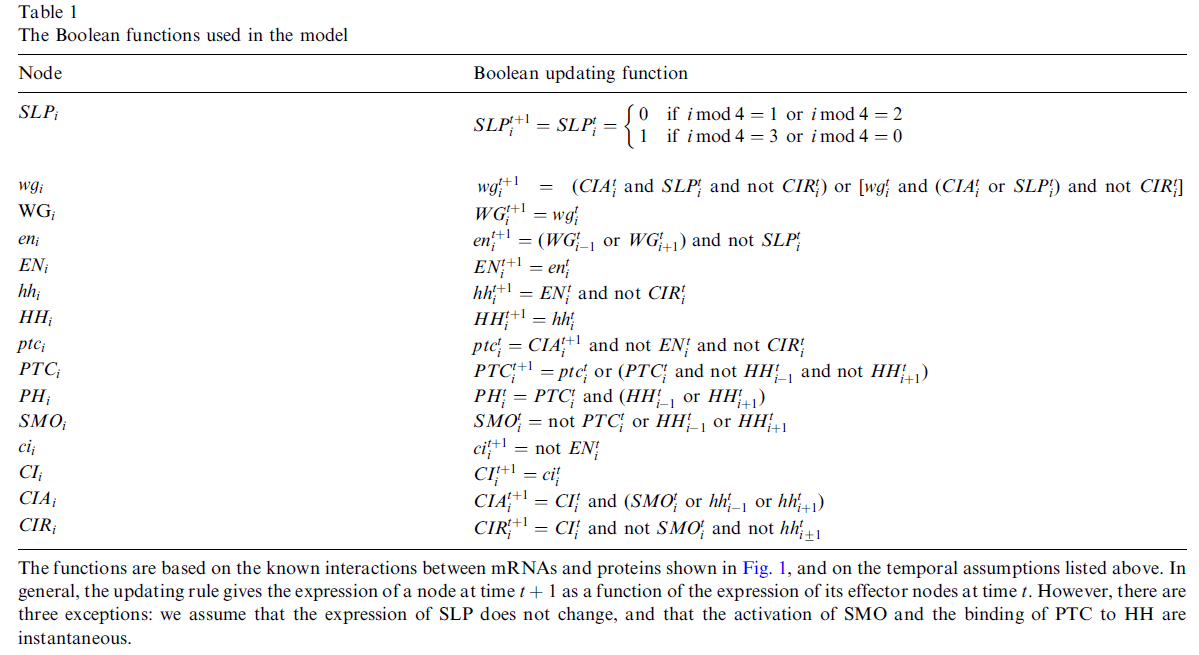

**Assumptions of the model:**



1.  The effect of transcriptional activators and inhibitors is never additive,  but rather, inhibitors are dominant 
2.  Transcription and translation are ON/OFF functions of the state
3.  If transcription/translation is ON, mRNAs/ proteins are synthesized in one time step
4. mRNAs decay in one time step if not transcribed
5. transcription factors and proteins undergoing posttranslational modification decay in one time step if their mRNA is not present.






**Steady State expression:**
At Steady-State, it can be assumed that the gene expression are the fixed points of the discrete dynamical system i.e., x_i^(t+1)=x_i^t , and thus, the table 1 leads to following equations: 

SLPi ={(0 if i mod 4 = 1 or i mod 4 = 2
       1 if i mod 4 = 3 or i mod 4 = 0)  

wgi =(CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi];

WGi =wgi ;

eni =(WGi-1 or WGi+1) and not SLPi ;

ENi =eni;

hhi =ENi and not CIRi;

HHi = hhi;

ptci =CIAi and not ENi and not CIRi ;

PTCi =ptci or (PTCi and not HHi-1 and not HHi+1);

PHi =PTCi and (HHi-1 or HHi+1);

SMOi =not PTCi or HHi-1 or HHi+1;

cii =not ENi ;

CIi =cii ;

CIAi =CIi and (SMOi or hhi-1 or hhi+1);

CIRi =CIi and not SMOi and not hhi-1 and not hhi+1 ....................(1)

Assume each parasegments to be identical, thus, i can run only from 1 to 4, i.e. the width of one parasegment. The majority of the variables in the above equations can be eliminated, with the exception of wgi and PTCi : The expression of these nodes appears on both sides of the equations, reflecting the cycles of wg and PTC in the above equations. The final set of equations to be solved to find the steady states is

wg1 = wg1 and not wg2 and not wg4;

wg2 =wg2 and not wg1 and not wg3;

wg3 =wg1 or wg3;

wg4 =wg2 or wg4;

PTC1 =(not wg2 and not wg4) or (PTC1 and not wg1 and not wg3);

PTC2 =(not wg1 and not wg3) or (PTC2 and not wg2 and not wg4);

PTC3 =1;

PTC4 =1 ...........................................(2)


**Task 1**

Construct the boolean function for all the genes and proteins of the segment polarity network (refer table 1 or equation 1 and 2).

The functions can be obtained using boolean operators OR, AND, NOT. Each node/gene/ protein can have separate function. Complete the following code for all the nodes of the network: 



In [ ]:
def wg(wg0 = wg_ini, cia0 = cia_ini, cir0 = cir_ini):
    """
    **wg**
    Given:
        wg, CIA, CIR
    Equation to solve: 
        wgi = (CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi]
    """
    
    wg_final = list() #Final Array of wg
    
    #First loop for iteration over parasegmants, second loop for cells in the parasegment
    
    for i, cell_value in enumerate(wg0):
        temp_wg = wg0[i]
        tmp_cia = cia0[i]
        tmp_cir = cir0[i]
        tmp_slp = slp_ini[i]
            
        #If equation is true, add 1 to the parasegmant array of wg, else add 0. 
        #breakdown of equation of wg is below:
        bool1 = tmp_cia and tmp_slp and not tmp_cir
        bool2 = tmp_cia or tmp_slp
        bool3 = temp_wg and bool2 and not tmp_cir
        bool4 = bool1 or bool3
        #if (tmp_cia and tmp_slp and not tmp_cir) or (temp_wg and (tmp_cia or tmp_slp) and not tmp_cir):
        if bool4:
            wg_final.append(1)
        else:
            wg_final.append(0)
    
    return wg_final
    
def wingless(wg0 = wg_ini):
    """
        **WG**
    Given:
        wg
    Equation to solve: 
        WGi = wgi 
    """
    return wg0

    def en(wingless0 = wingless_ini):
    """
    **en**
    Given:
        WG
    Equation to solve: 
        eni = (WGi−1 or WGi+1) and not SLPi
        
    For WGi−1 and WGi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    en_final = list()

    for i, cell_value in enumerate(wingless0):
        if i == 0:
            wg_minus1 = wingless0[3]
        else:
            wg_minus1 = wingless0[i-1]
            
        if i == 3:
            wg_plus1 = wingless0[0]
        else:
            wg_plus1 = wingless0[i+1]

        tmp_slp = slp_ini[i]
            
        bool1 = wg_minus1 or wg_plus1
        bool2 = bool1 and not tmp_slp
        #if ((wg_minus1 or wg_plus1) and not tmp_slp):
        if bool2:
            en_final.append(1)
        else:
            en_final.append(0)
    
    return en_final
    
def engrailed(en0 = en_ini):
    """
    **EN**
    Given:
        en
    Equation to solve: 
        ENi = eni
    """
    return en0

IndentationError: ignored

In [ ]:
def wg(wg0 = wg_ini, cia0 = cia_ini, cir0 = cir_ini):
    """
    **wg**
    Given:
        wg, CIA, CIR
    Equation to solve: 
        wgi = (CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi]
    """
    
    wg_final = list() #Final Array of wg
    
    #First loop for iteration over parasegmants, second loop for cells in the parasegment
    
    for i, cell_value in enumerate(wg0):
        temp_wg = wg0[i]
        tmp_cia = cia0[i]
        tmp_cir = cir0[i]
        tmp_slp = slp_ini[i]
            
        #If equation is true, add 1 to the parasegmant array of wg, else add 0. 
        #breakdown of equation of wg is below:
        bool1 = tmp_cia and tmp_slp and not tmp_cir
        bool2 = tmp_cia or tmp_slp
        bool3 = temp_wg and bool2 and not tmp_cir
        bool4 = bool1 or bool3
        #if (tmp_cia and tmp_slp and not tmp_cir) or (temp_wg and (tmp_cia or tmp_slp) and not tmp_cir):
        if bool4:
            wg_final.append(1)
        else:
            wg_final.append(0)
    
    return wg_final
    
def wingless(wg0 = wg_ini):
    """
        **WG**
    Given:
        wg
    Equation to solve: 
        WGi = wgi 
    """
    return wg0

def en(wingless0 = wingless_ini):
    """
    **en**
    Given:
        WG
    Equation to solve: 
        eni = (WGi−1 or WGi+1) and not SLPi
        
    For WGi−1 and WGi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    en_final = list()
    
    for i, cell_value in enumerate(wingless0):
        if i == 0:
            wg_minus1 = wingless0[3]
        else:
            wg_minus1 = wingless0[i-1]
            
        if i == 3:
            wg_plus1 = wingless0[0]
        else:
            wg_plus1 = wingless0[i+1]

        tmp_slp = slp_ini[i]
            
        bool1 = wg_minus1 or wg_plus1
        bool2 = bool1 and not tmp_slp
        #if ((wg_minus1 or wg_plus1) and not tmp_slp):
        if bool2:
            en_final.append(1)
        else:
            en_final.append(0)
    
    return en_final
    
def engrailed(en0 = en_ini):
    """
    **EN**
    Given:
        en
    Equation to solve: 
        ENi = eni
    """
    return en0

def hh(engrailed0 = engrailed_ini, cir0 = cir_ini):
    """
    **hh**
    Given:
        EN, CIR
    Equation to solve: 
        hhi = ENi and not CIRi
    """
    hh_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
            
        bool1 = tmp_en and not tmp_cir
        #if (tmp_en and not tmp_cir):
        if bool1:
            hh_final.append(1)
        else:
            hh_final.append(0)
    
    return hh_final
    
    
def hedgehog(hh0 = hh_ini):
    """
    **HH**
    Given:
        hh
    Equation to solve: 
        HHi = hhi
    """
    return hh0
    
def ptc(engrailed0 = engrailed_ini, cir0 = cir_ini, cia0 = cia_ini):
    """
    **ptc**
    Given:
        CIA, EN, CIR
    Equation to solve: 
        ptci = CIAi and not ENi and not CIRi
    """
    
    ptc_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
        tmp_cia = cia0[i]
            
        bool1 = tmp_cia and not tmp_en and not tmp_cir
        #if (tmp_cia and not tmp_en and not tmp_cir):
        if bool1:
            ptc_final.append(1)
        else:
            ptc_final.append(0)
    
    return ptc_final
    

def patched_protein(ptc0 = ptc_ini, patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PTC**
    Given:
        ptc, PTC, HH
    Equation to solve: 
        PTCi = ptci or (PTCi and not HHi−1 and not HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    patched_final = list()

    for i, cell_value in enumerate(ptc0):
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_ptc = ptc0[i]
        tmp_ptc_pt = patched0[i]
            
            
        bool1 = tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1
        bool2 = tmp_ptc or bool1
        #if (tmp_ptc or (tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1)):
        if bool2:
            patched_final.append(1)
        else:
            patched_final.append(0)
    
    return patched_final    
    
def ph(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PH**
    Given:
        PTC, HH
    Equation to solve: 
        PHi(t) = PTCi and (HHi−1 or HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    ph_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_patched = patched0[i]
            
        bool1 = hedgehog_minus1 or hedgehog_plus1
        bool2 = tmp_patched and bool1
        #if (tmp_patched and (hedgehog_minus1 or hedgehog_plus1)):
        if bool2:
            ph_final.append(1)
        else:
            ph_final.append(0)
    
    return ph_final

def smo(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **SMO**
    Given:
        PTC, HH
    Equation to solve: 
        SMOi(t) = not PTCi or HHi−1 or HHi+1
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    smo_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
        
        tmp_patched = patched0[i]
            
        bool1 = not tmp_patched or hedgehog_minus1 or hedgehog_plus1
        #if (not tmp_patched or hedgehog_minus1 or hedgehog_plus1):
        if bool1:
            smo_final.append(1)
        else:
            smo_final.append(0)
    
    return smo_final
    
def ci(engrailed0 = engrailed_ini):
    """
    **ci**
    Given:
        EN
    Equation to solve: 
        cii = not ENi
    """

    ci_final = list()

    for i, cell_value in enumerate(engrailed0):
        ci_final.append(int(not engrailed0[i]))
    
    return ci_final
    
def cubitus_interruptor(ci0 = ci_ini):
    """
    **CI**
    Given:
        ci
    Equation to solve: 
        CIi = cii
    """
    return ci0

def cia(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIA**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIAi = CIi and (SMOi or hhi−1 or hhi+1)
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cia_final = list()

    for i, cell_value in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_smo or hh_minus1 or hh_plus1
        bool2 = tmp_cubitus and bool1
        #if (not tmp_cubitus and (tmp_smo or hh_minus1 or hh_plus1)):
        if bool2:
            cia_final.append(1)
        else:
            cia_final.append(0)
    
    return cia_final
    
def cir(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIR**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIRi = CIi and not SMOi and not hhi−1 and not hhi+1
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cir_final = list()
    
    for i, segment in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1 
        #if (tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1):
        if bool1:
            cir_final.append(1)
        else:
            cir_final.append(0)
    
    return cir_final


**Initial states for Wild-type segment polarity genes**  

The experimentally observed initial state conditions before stage 8 is as follows:

1. A two-cell-wide SLP stripe in the posterior half,

2. A single-cell-wide wg stripe in the most posterior part, 

3. Single-cell-wide en and hh stripes in the most anterior part,

4. ci and ptc expressed in the posterior threefourths,

5. Since the proteins are translated after the mRNAs are transcribed, we assume that the proteins are not expressed in the initial state.

The one-dimensional representation of the mRNA and protein patterns is shown in Fig. 4(a).

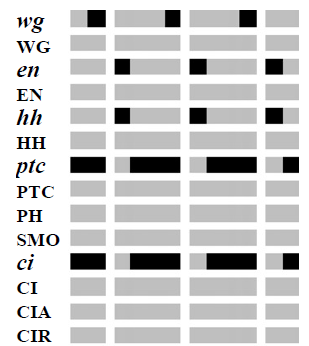


**Task 2**

Obtain steady-state expression for wild-type segment polarity genes.

**Hint**: Use initial states of the wild-type segment polarity genes to solve the gene functions obtained in task 1.

Expected output:
 
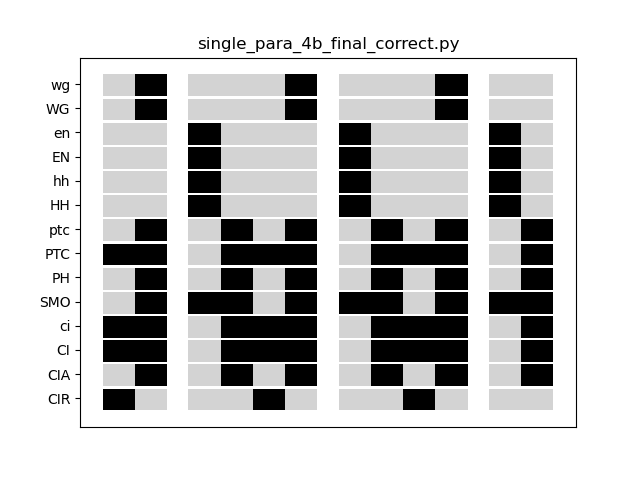


wg:  [0, 0, 0, 1]
WG:  [0, 0, 0, 0]
en:  [1, 0, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 1, 1, 1]
PTC:  [0, 0, 0, 0]
PH:  [0, 0, 0, 0]
SMO:  [0, 0, 0, 0]
ci:  [0, 1, 1, 1]
CI:  [0, 0, 0, 0]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 1 iterations:
wg:  [0, 0, 0, 1]
WG:  [0, 0, 0, 1]
en:  [0, 0, 0, 0]
EN:  [1, 0, 0, 0]
hh:  [0, 0, 0, 0]
HH:  [1, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [0, 1, 1, 1]
PH:  [0, 0, 0, 0]
SMO:  [1, 1, 1, 1]
ci:  [1, 1, 1, 1]
CI:  [0, 1, 1, 1]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 2 iterations:
wg:  [0, 0, 0, 1]
WG:  [0, 0, 0, 1]
en:  [1, 0, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [0, 1, 1, 1]
PH:  [0, 1, 0, 1]
SMO:  [1, 1, 0, 1]
ci:  [0, 1, 1, 1]
CI:  [1, 1, 1, 1]
CIA:  [0, 1, 1, 1]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 3 iterations:
wg:  [0, 0, 0

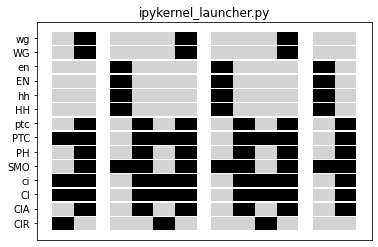

In [ ]:
"""
SOLUTION FOR TASK 2
Initial values are sent to the equations as input. 
Variation added for WG, EN, CI. Changed logic for i-1 and i+1
Before the iteration ends, the calculated values are written over initial values.
In this way, calculated values are initial values for the next iteration.

"""

import matplotlib.pyplot as plt
import sys    
import os    
file_name =  os.path.basename(sys.argv[0])

# Protein name appended by ini is initial state of that protein

#Below is Fig.4(a)

slp_ini = [0, 0, 1, 1]
wg_ini = [0, 0, 0, 1]
wingless_ini = [0, 0, 0, 0]
en_ini = [1, 0, 0, 0]
engrailed_ini = [0, 0, 0, 0]
hh_ini = [1, 0, 0, 0]
hedgehog_ini = [0, 0, 0, 0]
ptc_ini = [0, 1, 1, 1]
patched_ini = [0, 0, 0, 0]
ph_ini = [0, 0, 0, 0]
smo_ini = [0, 0, 0, 0]
ci_ini = [0, 1, 1, 1]
cubitus_interruptor_ini = [0, 0, 0, 0]
cia_ini = [0, 0, 0, 0]
cir_ini = [0, 0, 0, 0]


def wg(wg0 = wg_ini, cia0 = cia_ini, cir0 = cir_ini):
    """
    **wg**
    Given:
        wg, CIA, CIR
    Equation to solve: 
        wgi = (CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi]
    """
    
    wg_final = list() #Final Array of wg
    
    #First loop for iteration over parasegmants, second loop for cells in the parasegment
    
    for i, cell_value in enumerate(wg0):
        temp_wg = wg0[i]
        tmp_cia = cia0[i]
        tmp_cir = cir0[i]
        tmp_slp = slp_ini[i]
            
        #If equation is true, add 1 to the parasegmant array of wg, else add 0. 
        #breakdown of equation of wg is below:
        bool1 = tmp_cia and tmp_slp and not tmp_cir
        bool2 = tmp_cia or tmp_slp
        bool3 = temp_wg and bool2 and not tmp_cir
        bool4 = bool1 or bool3
        #if (tmp_cia and tmp_slp and not tmp_cir) or (temp_wg and (tmp_cia or tmp_slp) and not tmp_cir):
        if bool4:
            wg_final.append(1)
        else:
            wg_final.append(0)
    
    return wg_final
    
def wg_eq4(wg0 = wg_ini):
    """
        wg1 = wg1 and not wg2 and not wg4;
        wg2 = wg2 and not wg1 and not wg3;
        wg3 = wg1 or wg3;
        wg4 = wg2 or wg4;
    
    """
    
    wg_final = list() #Final Array of wg
    
    wg_final.clear()
    #Loop for iteration over parasegmants
    wg_final.append(int(wg0[0] and not wg0[1] and not wg0[3]))
    wg_final.append(int(wg0[1] and not wg0[0] and not wg0[2]))
    wg_final.append(int(wg0[0] or wg0[2]))
    wg_final.append(int(wg0[1] or wg0[3]))
            
    return wg_final
    
def wingless(wg0 = wg_ini):
    """
        **WG**
    Given:
        wg
    Equation to solve: 
        WGi = wgi 
    """
    return wg0

def en(wingless0 = wingless_ini):
    """
    **en**
    Given:
        WG
    Equation to solve: 
        eni = (WGi−1 or WGi+1) and not SLPi
        
    For WGi−1 and WGi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    en_final = list()
    
    for i, cell_value in enumerate(wingless0):
        if i == 0:
            wg_minus1 = wingless0[3]
        else:
            wg_minus1 = wingless0[i-1]
            
        if i == 3:
            wg_plus1 = wingless0[0]
        else:
            wg_plus1 = wingless0[i+1]

        tmp_slp = slp_ini[i]
            
        bool1 = wg_minus1 or wg_plus1
        bool2 = bool1 and not tmp_slp
        #if ((wg_minus1 or wg_plus1) and not tmp_slp):
        if bool2:
            en_final.append(1)
        else:
            en_final.append(0)
    
    return en_final
    
def engrailed(en0 = en_ini):
    """
    **EN**
    Given:
        en
    Equation to solve: 
        ENi = eni
    """
    return en0

def hh(engrailed0 = engrailed_ini, cir0 = cir_ini):
    """
    **hh**
    Given:
        EN, CIR
    Equation to solve: 
        hhi = ENi and not CIRi
    """
    hh_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
            
        bool1 = tmp_en and not tmp_cir
        #if (tmp_en and not tmp_cir):
        if bool1:
            hh_final.append(1)
        else:
            hh_final.append(0)
    
    return hh_final
    
    
def hedgehog(hh0 = hh_ini):
    """
    **HH**
    Given:
        hh
    Equation to solve: 
        HHi = hhi
    """
    return hh0
    
def ptc(engrailed0 = engrailed_ini, cir0 = cir_ini, cia0 = cia_ini):
    """
    **ptc**
    Given:
        CIA, EN, CIR
    Equation to solve: 
        ptci = CIAi and not ENi and not CIRi
    """
    
    ptc_final = list()
    
    #cia0 = cia(cubitus0, smo0, hh0)
    for i, cell_value in enumerate(engrailed0):
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
        tmp_cia = cia0[i]
            
        bool1 = tmp_cia and not tmp_en and not tmp_cir
        #if (tmp_cia and not tmp_en and not tmp_cir):
        if bool1:
            ptc_final.append(1)
        else:
            ptc_final.append(0)
    
    return ptc_final
    
def ptc_eq4(ptc0 = patched_ini, wg0 = wg_ini):

    """
    PTC1 = (not wg2 and not wg4) or (PTC1 and not wg1 and not wg3)
    PTC2 = (not wg1 and not wg3) or (PTC2 and not wg2 and not wg4)
    PTC3 = 1
    PTC4 = 1
    """
    
    ptc_final = list() #Final Array of w
    
    #Loop for iteration over parasegmants
    ptc_final.clear()
    bool1 = (not wg0[1] and not wg0[3]) or (ptc0[0] and not wg0[0] and not wg0[2])
    bool2 = (not wg0[0] and not wg0[2]) or (ptc0[1] and not wg0[1] and not wg0[3])
    ptc_final.append(int(bool1))
    ptc_final.append(int(bool2))
    ptc_final.append(1)
    ptc_final.append(1)
    
    return ptc_final
    

    

def patched_protein(ptc0 = ptc_ini, patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PTC**
    Given:
        ptc, PTC, HH
    Equation to solve: 
        PTCi = ptci or (PTCi and not HHi−1 and not HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    patched_final = list()
    
    for i, cell_value in enumerate(ptc0):
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_ptc = ptc0[i]
        tmp_ptc_pt = patched0[i]
            
            
        bool1 = tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1
        bool2 = tmp_ptc or bool1
        #if (tmp_ptc or (tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1)):
        if bool2:
            patched_final.append(1)
        else:
            patched_final.append(0)
    
    return patched_final    
    
def ph(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PH**
    Given:
        PTC, HH
    Equation to solve: 
        PHi(t) = PTCi and (HHi−1 or HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    ph_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_patched = patched0[i]
            
        bool1 = hedgehog_minus1 or hedgehog_plus1
        bool2 = tmp_patched and bool1
        #if (tmp_patched and (hedgehog_minus1 or hedgehog_plus1)):
        if bool2:
            ph_final.append(1)
        else:
            ph_final.append(0)
    
    return ph_final

def smo(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **SMO**
    Given:
        PTC, HH
    Equation to solve: 
        SMOi(t) = not PTCi or HHi−1 or HHi+1
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    smo_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
        
        tmp_patched = patched0[i]
            
        bool1 = not tmp_patched or hedgehog_minus1 or hedgehog_plus1
        #if (not tmp_patched or hedgehog_minus1 or hedgehog_plus1):
        if bool1:
            smo_final.append(1)
        else:
            smo_final.append(0)
    
    return smo_final
    
def ci(engrailed0 = engrailed_ini):
    """
    **ci**
    Given:
        EN
    Equation to solve: 
        cii = not ENi
    """

    ci_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        ci_final.append(int(not engrailed0[i]))
    
    return ci_final
    
def cubitus_interruptor(ci0 = ci_ini):
    """
    **CI**
    Given:
        ci
    Equation to solve: 
        CIi = cii
    """
    return ci0

def cia(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIA**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIAi = CIi and (SMOi or hhi−1 or hhi+1)
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cia_final = list()
    
    for i, cell_value in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_smo or hh_minus1 or hh_plus1
        bool2 = tmp_cubitus and bool1
        #if (not tmp_cubitus and (tmp_smo or hh_minus1 or hh_plus1)):
        if bool2:
            cia_final.append(1)
        else:
            cia_final.append(0)
    
    return cia_final
    
def cir(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIR**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIRi = CIi and not SMOi and not hhi−1 and not hhi+1
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cir_final = list()
    
    for i, segment in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1 
        #if (tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1):
        if bool1:
            cir_final.append(1)
        else:
            cir_final.append(0)
    
    return cir_final

if __name__ == '__main__':

    print("wg: " , wg_ini)
    print("WG: ", wingless_ini)
    print("en: ", en_ini)
    print("EN: ", engrailed_ini)
    print("hh: ", hh_ini)
    print("HH: ", hedgehog_ini)
    print("ptc: ", ptc_ini)
    print("PTC: ", patched_ini)
    print("PH: ", ph_ini)
    print("SMO: ", smo_ini)
    print("ci: ", ci_ini)
    print("CI: ", cubitus_interruptor_ini)
    print("CIA: ", cia_ini)
    print("CIR: ", cir_ini)
    
    wg0 = wg_ini
    wingless0 = wingless_ini
    en0 = en_ini
    engrailed0 = engrailed_ini
    hh0 = hh_ini
    hedgehog0 = hedgehog_ini
    ptc0 = ptc_ini
    patched0 = patched_ini
    ph0 = ph_ini
    smo0 = smo_ini
    ci0 = ci_ini
    cubitus0 = cubitus_interruptor_ini
    cia0 = cia_ini
    cir0 = cir_ini
    
    #Keeping iteration count high to check steady state. If steady for 6, it will be steady for 20 as well.
    for x in range(20):
        #wg1 = wg(wg0, cia0, cir0)
        wg1 = wg_eq4(wg0)
        wingless1 = wingless(wg1)
        en1 = en(wingless0)
        engrailed1 = engrailed(en0)
        hh1 = hh(engrailed0, cir0)
        hedgehog1 = hedgehog(hh0)
        ptc1 = ptc(engrailed0, cir0, cia0)
        #patched1 = patched_protein(ptc0, patched0, hedgehog0) #hedgehog1
        patched1 = ptc_eq4(patched0, wg0)
        ph1 = ph(patched0, hedgehog0) #hedgehog1
        smo1 = smo(patched0, hedgehog0) #hedgehog1
        ci1 = ci(engrailed0)
        cubitus1 = cubitus_interruptor(ci0)
        cia1 = cia(cubitus0, smo0, hh0) #hh1
        cir1 = cir(cubitus0, smo0, hh0) #hh1
        
        wg0 = wg1
        wingless0 = wingless1
        en0 = en1
        engrailed0 = engrailed1
        hh0 = hh1
        hedgehog0 = hedgehog1
        ptc0 = ptc1
        patched0 = patched1
        ph0 = ph1
        smo0 = smo1
        ci0 = ci1
        cubitus0 = cubitus1
        cia0 = cia1
        cir0 = cir1
        
        
        print("---------------------------------------------------")
        print("After", x+1, "iterations:")
        print("wg: " , wg0)
        print("WG: ", wingless0)
        print("en: ", en0)
        print("EN: ", engrailed0)
        print("hh: ", hh0)
        print("HH: ", hedgehog0)
        print("ptc: ", ptc0)
        print("PTC: ", patched0)
        print("PH: ", ph0)
        print("SMO: ", smo0)
        print("ci: ", ci0)
        print("CI: ", cubitus0)
        print("CIA: ", cia0)
        print("CIR: ", cir0)
        
    
    """
    Figure section:
    """
    
    
    wg_graph = [None] * 12
    wingless_graph = [None] * 12
    en_graph = [None] * 12
    engrailed_graph = [None] * 12
    hh_graph = [None] * 12
    hedgehog_graph = [None] * 12
    ptc_graph = [None] * 12
    patched_graph = [None] * 12
    ph_graph = [None] * 12
    smo_graph = [None] * 12
    ci_graph = [None] * 12
    cubitus_graph = [None] * 12
    cia_graph = [None] * 12
    cir_graph = [None] * 12
    
    bar_graph = [(10,15), (25,15), (50,15), (65,15), (80,15), (95,15), (120,15), (135,15), (150,15), (165,15), (190,15), (205,15)]
    for i, segment in enumerate(wg0):
        if wg0[i] == 1:
            wg_graph[i+2] = 'black'
            wg_graph[i+6] = 'black'
            wg_graph[i-2] = 'black'
        else:
            wg_graph[i+2] = 'lightgrey'
            wg_graph[i+6] = 'lightgrey'
            wg_graph[i-2] = 'lightgrey'
            
        if wingless0[i] == 1:
            wingless_graph[i+2] = 'black'
            wingless_graph[i+6] = 'black'
            wingless_graph[i-2] = 'black'
        else:
            wingless_graph[i+2] = 'lightgrey'
            wingless_graph[i+6] = 'lightgrey'
            wingless_graph[i-2] = 'lightgrey'
        
        if en0[i] == 1:
            en_graph[i+2] = 'black'
            en_graph[i+6] = 'black'
            en_graph[i-2] = 'black'
        else:
            en_graph[i+2] = 'lightgrey'
            en_graph[i+6] = 'lightgrey'
            en_graph[i-2] = 'lightgrey'
        
        if engrailed0[i] == 1:
            engrailed_graph[i+2] = 'black'
            engrailed_graph[i+6] = 'black'
            engrailed_graph[i-2] = 'black'
        else:
            engrailed_graph[i+2] = 'lightgrey'
            engrailed_graph[i+6] = 'lightgrey'
            engrailed_graph[i-2] = 'lightgrey'
        
        if hh0[i] == 1:
            hh_graph[i+2] = 'black'
            hh_graph[i+6] = 'black'
            hh_graph[i-2] = 'black'
        else:
            hh_graph[i+2] = 'lightgrey'
            hh_graph[i+6] = 'lightgrey'
            hh_graph[i-2] = 'lightgrey'
        
        if hedgehog0[i] == 1:
            hedgehog_graph[i+2] = 'black'
            hedgehog_graph[i+6] = 'black'
            hedgehog_graph[i-2] = 'black'
        else:
            hedgehog_graph[i+2] = 'lightgrey'
            hedgehog_graph[i+6] = 'lightgrey'
            hedgehog_graph[i-2] = 'lightgrey'
        
        if ptc0[i] == 1:
            ptc_graph[i+2] = 'black'
            ptc_graph[i+6] = 'black'
            ptc_graph[i-2] = 'black'
        else:
            ptc_graph[i+2] = 'lightgrey'
            ptc_graph[i+6] = 'lightgrey'
            ptc_graph[i-2] = 'lightgrey'
        
        if patched0[i] == 1:
            patched_graph[i+2] = 'black'
            patched_graph[i+6] = 'black'
            patched_graph[i-2] = 'black'
        else:
            patched_graph[i+2] = 'lightgrey'
            patched_graph[i+6] = 'lightgrey'
            patched_graph[i-2] = 'lightgrey'
        
        if ph0[i] == 1:
            ph_graph[i+2] = 'black'
            ph_graph[i+6] = 'black'
            ph_graph[i-2] = 'black'
        else:
            ph_graph[i+2] = 'lightgrey'
            ph_graph[i+6] = 'lightgrey'
            ph_graph[i-2] = 'lightgrey'
        
        if smo0[i] == 1:
            smo_graph[i+2] = 'black'
            smo_graph[i+6] = 'black'
            smo_graph[i-2] = 'black'
        else:
            smo_graph[i+2] = 'lightgrey'
            smo_graph[i+6] = 'lightgrey'
            smo_graph[i-2] = 'lightgrey'
        
        if ci0[i] == 1:
            ci_graph[i+2] = 'black'
            ci_graph[i+6] = 'black'
            ci_graph[i-2] = 'black'
        else:
            ci_graph[i+2] = 'lightgrey'
            ci_graph[i+6] = 'lightgrey'
            ci_graph[i-2] = 'lightgrey'
        
        if cubitus0[i] == 1:
            cubitus_graph[i+2] = 'black'
            cubitus_graph[i+6] = 'black'
            cubitus_graph[i-2] = 'black'
        else:
            cubitus_graph[i+2] = 'lightgrey'
            cubitus_graph[i+6] = 'lightgrey'
            cubitus_graph[i-2] = 'lightgrey'
        
        if cia0[i] == 1:
            cia_graph[i+2] = 'black'
            cia_graph[i+6] = 'black'
            cia_graph[i-2] = 'black'
        else:
            cia_graph[i+2] = 'lightgrey'
            cia_graph[i+6] = 'lightgrey'
            cia_graph[i-2] = 'lightgrey'
        
        if cir0[i] == 1:
            cir_graph[i+2] = 'black'
            cir_graph[i+6] = 'black'
            cir_graph[i-2] = 'black'
        else:
            cir_graph[i+2] = 'lightgrey'
            cir_graph[i+6] = 'lightgrey'
            cir_graph[i-2] = 'lightgrey'
            
    fig , ax= plt.subplots()
    
    ax.broken_barh(bar_graph, (140, 9), facecolors = wg_graph)
    ax.broken_barh(bar_graph, (130, 9), facecolors = wingless_graph)
    ax.broken_barh(bar_graph, (120, 9), facecolors = en_graph)
    ax.broken_barh(bar_graph, (110, 9), facecolors = engrailed_graph)
    ax.broken_barh(bar_graph, (100, 9), facecolors = hh_graph)
    ax.broken_barh(bar_graph, (90, 9), facecolors = hedgehog_graph)
    ax.broken_barh(bar_graph, (80, 9), facecolors = ptc_graph)
    ax.broken_barh(bar_graph, (70, 9), facecolors = patched_graph)
    ax.broken_barh(bar_graph, (60, 9), facecolors = ph_graph)
    ax.broken_barh(bar_graph, (50, 9), facecolors = smo_graph)
    ax.broken_barh(bar_graph, (40, 9), facecolors = ci_graph)
    ax.broken_barh(bar_graph, (30, 9), facecolors = cubitus_graph)
    ax.broken_barh(bar_graph, (20, 9), facecolors = cia_graph)
    ax.broken_barh(bar_graph, (10, 9), facecolors = cir_graph)
    ax.set_yticks([15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145])

    ax.set_yticklabels(['CIR', 'CIA', 'CI', 'ci', 'SMO', 'PH', 'PTC', 'ptc', 'HH', 'hh', 'EN', 'en', 'WG', 'wg'])
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.title(file_name)
    plt.show()

**Task 3**

In a heat-shock experiment, **gene hh and en were ubiquitously induced**. Using the model constructed in task 1, obtain the steady-state gene expression pattern for all the genes in the network. 

Expected Output:

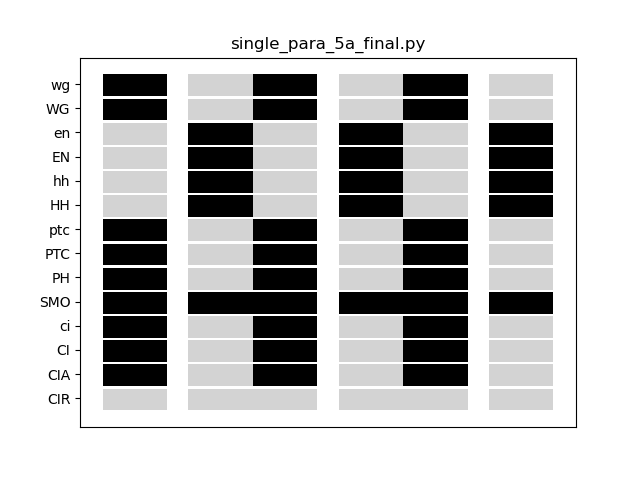




wg:  [0, 0, 0, 1]
WG:  [0, 0, 0, 0]
en:  [1, 1, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 1, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 1, 1, 1]
PTC:  [0, 0, 0, 0]
PH:  [0, 0, 0, 0]
SMO:  [0, 0, 0, 0]
ci:  [0, 1, 1, 1]
CI:  [0, 0, 0, 0]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 1 iterations:
wg:  [0, 0, 0, 1]
WG:  [0, 0, 0, 1]
en:  [0, 0, 0, 0]
EN:  [1, 1, 0, 0]
hh:  [0, 0, 0, 0]
HH:  [1, 1, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [0, 1, 1, 1]
PH:  [0, 0, 0, 0]
SMO:  [1, 1, 1, 1]
ci:  [1, 1, 1, 1]
CI:  [0, 1, 1, 1]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 2 iterations:
wg:  [0, 0, 0, 1]
WG:  [0, 0, 0, 1]
en:  [1, 0, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 1, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [0, 0, 0, 0]
PH:  [0, 1, 1, 1]
SMO:  [1, 1, 1, 1]
ci:  [0, 0, 1, 1]
CI:  [1, 1, 1, 1]
CIA:  [0, 1, 1, 1]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 3 iterations:
wg:  [0, 0, 1

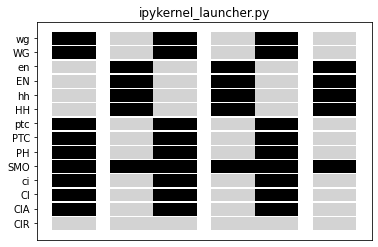

In [ ]:
"""
SOLUTION FOR TASK 3
Initial values are sent to the equations as input. 
Variation added for WG, EN, CI. Changed logic for i-1 and i+1
Before the iteration ends, the calculated values are written over initial values.
In this way, calculated values are initial values for the next iteration.

"""

import matplotlib.pyplot as plt
import sys    
import os    
file_name =  os.path.basename(sys.argv[0])

# Protein name appended by ini is initial state of that protein

#5(a)
slp_ini = [0, 0, 1, 1]
wg_ini = [0, 0, 0, 1]
wingless_ini = [0, 0, 0, 0]
en_ini = [1, 1, 0, 0]
engrailed_ini = [0, 0, 0, 0]
hh_ini = [1, 1, 0, 0]
hedgehog_ini = [0, 0, 0, 0]
ptc_ini = [0, 1, 1, 1]
patched_ini = [0, 0, 0, 0]
ph_ini = [0, 0, 0, 0]
smo_ini = [0, 0, 0, 0]
ci_ini = [0, 1, 1, 1]
cubitus_interruptor_ini = [0, 0, 0, 0]
cia_ini = [0, 0, 0, 0]
cir_ini = [0, 0, 0, 0]

def wg(wg0 = wg_ini, cia0 = cia_ini, cir0 = cir_ini):
    """
    **wg**
    Given:
        wg, CIA, CIR
    Equation to solve: 
        wgi = (CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi]
    """
    
    wg_final = list() #Final Array of wg
    
    #First loop for iteration over parasegmants, second loop for cells in the parasegment
    
    for i, cell_value in enumerate(wg0):
        temp_wg = wg0[i]
        tmp_cia = cia0[i]
        tmp_cir = cir0[i]
        tmp_slp = slp_ini[i]
            
        #If equation is true, add 1 to the parasegmant array of wg, else add 0. 
        #breakdown of equation of wg is below:
        bool1 = tmp_cia and tmp_slp and not tmp_cir
        bool2 = tmp_cia or tmp_slp
        bool3 = temp_wg and bool2 and not tmp_cir
        bool4 = bool1 or bool3
        #if (tmp_cia and tmp_slp and not tmp_cir) or (temp_wg and (tmp_cia or tmp_slp) and not tmp_cir):
        if bool4:
            wg_final.append(1)
        else:
            wg_final.append(0)
    
    return wg_final
    
def wingless(wg0 = wg_ini):
    """
        **WG**
    Given:
        wg
    Equation to solve: 
        WGi = wgi 
    """
    return wg0

def en(wingless0 = wingless_ini):
    """
    **en**
    Given:
        WG
    Equation to solve: 
        eni = (WGi−1 or WGi+1) and not SLPi
        
    For WGi−1 and WGi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    en_final = list()
    
    for i, cell_value in enumerate(wingless0):
        if i == 0:
            wg_minus1 = wingless0[3]
        else:
            wg_minus1 = wingless0[i-1]
            
        if i == 3:
            wg_plus1 = wingless0[0]
        else:
            wg_plus1 = wingless0[i+1]

        tmp_slp = slp_ini[i]
            
        bool1 = wg_minus1 or wg_plus1
        bool2 = bool1 and not tmp_slp
        #if ((wg_minus1 or wg_plus1) and not tmp_slp):
        if bool2:
            en_final.append(1)
        else:
            en_final.append(0)
    
    return en_final
    
def engrailed(en0 = en_ini):
    """
    **EN**
    Given:
        en
    Equation to solve: 
        ENi = eni
    """
    return en0

def hh(engrailed0 = engrailed_ini, cir0 = cir_ini):
    """
    **hh**
    Given:
        EN, CIR
    Equation to solve: 
        hhi = ENi and not CIRi
    """
    hh_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
            
        bool1 = tmp_en and not tmp_cir
        #if (tmp_en and not tmp_cir):
        if bool1:
            hh_final.append(1)
        else:
            hh_final.append(0)
    
    return hh_final
    
    
def hedgehog(hh0 = hh_ini):
    """
    **HH**
    Given:
        hh
    Equation to solve: 
        HHi = hhi
    """
    return hh0
    
def ptc(engrailed0 = engrailed_ini, cir0 = cir_ini, cia0 = cia_ini):
    """
    **ptc**
    Given:
        CIA, EN, CIR
    Equation to solve: 
        ptci = CIAi and not ENi and not CIRi
    """
    
    ptc_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
        tmp_cia = cia0[i]
            
        bool1 = tmp_cia and not tmp_en and not tmp_cir
        #if (tmp_cia and not tmp_en and not tmp_cir):
        if bool1:
            ptc_final.append(1)
        else:
            ptc_final.append(0)
    
    return ptc_final
    

def patched_protein(ptc0 = ptc_ini, patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PTC**
    Given:
        ptc, PTC, HH
    Equation to solve: 
        PTCi = ptci or (PTCi and not HHi−1 and not HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    patched_final = list()
    
    for i, cell_value in enumerate(ptc0):
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_ptc = ptc0[i]
        tmp_ptc_pt = patched0[i]
            
            
        bool1 = tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1
        bool2 = tmp_ptc or bool1
        #if (tmp_ptc or (tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1)):
        if bool2:
            patched_final.append(1)
        else:
            patched_final.append(0)
    
    return patched_final    
    
def ph(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PH**
    Given:
        PTC, HH
    Equation to solve: 
        PHi(t) = PTCi and (HHi−1 or HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    ph_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_patched = patched0[i]
            
        bool1 = hedgehog_minus1 or hedgehog_plus1
        bool2 = tmp_patched and bool1
        #if (tmp_patched and (hedgehog_minus1 or hedgehog_plus1)):
        if bool2:
            ph_final.append(1)
        else:
            ph_final.append(0)
    
    return ph_final

def smo(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **SMO**
    Given:
        PTC, HH
    Equation to solve: 
        SMOi(t) = not PTCi or HHi−1 or HHi+1
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    smo_final = list()

    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
        
        tmp_patched = patched0[i]
            
        bool1 = not tmp_patched or hedgehog_minus1 or hedgehog_plus1
        #if (not tmp_patched or hedgehog_minus1 or hedgehog_plus1):
        if bool1:
            smo_final.append(1)
        else:
            smo_final.append(0)
    
    return smo_final
    
def ci(engrailed0 = engrailed_ini):
    """
    **ci**
    Given:
        EN
    Equation to solve: 
        cii = not ENi
    """

    ci_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        ci_final.append(int(not engrailed0[i]))
    
    return ci_final
    
def cubitus_interruptor(ci0 = ci_ini):
    """
    **CI**
    Given:
        ci
    Equation to solve: 
        CIi = cii
    """
    return ci0

def cia(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIA**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIAi = CIi and (SMOi or hhi−1 or hhi+1)
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cia_final = list()
    
    for i, cell_value in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_smo or hh_minus1 or hh_plus1
        bool2 = tmp_cubitus and bool1
        #if (not tmp_cubitus and (tmp_smo or hh_minus1 or hh_plus1)):
        if bool2:
            cia_final.append(1)
        else:
            cia_final.append(0)
    
    return cia_final
    
def cir(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIR**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIRi = CIi and not SMOi and not hhi−1 and not hhi+1
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cir_final = list()
    tmp_cir = list()
    #wg_ip = wingless(wg0)
    for i, segment in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1 
        #if (tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1):
        if bool1:
            cir_final.append(1)
        else:
            cir_final.append(0)
    
    return cir_final

if __name__ == '__main__':

    print("wg: " , wg_ini)
    print("WG: ", wingless_ini)
    print("en: ", en_ini)
    print("EN: ", engrailed_ini)
    print("hh: ", hh_ini)
    print("HH: ", hedgehog_ini)
    print("ptc: ", ptc_ini)
    print("PTC: ", patched_ini)
    print("PH: ", ph_ini)
    print("SMO: ", smo_ini)
    print("ci: ", ci_ini)
    print("CI: ", cubitus_interruptor_ini)
    print("CIA: ", cia_ini)
    print("CIR: ", cir_ini)
    
    wg0 = wg_ini
    wingless0 = wingless_ini
    en0 = en_ini
    engrailed0 = engrailed_ini
    hh0 = hh_ini
    hedgehog0 = hedgehog_ini
    ptc0 = ptc_ini
    patched0 = patched_ini
    ph0 = ph_ini
    smo0 = smo_ini
    ci0 = ci_ini
    cubitus0 = cubitus_interruptor_ini
    cia0 = cia_ini
    cir0 = cir_ini
    
    #Keeping iteration count high to check steady state. If steady for 6, it will be steady for 20 as well.
    for x in range(20):
        wg1 = wg(wg0, cia0, cir0)
        wingless1 = wingless(wg1)
        en1 = en(wingless0)
        engrailed1 = engrailed(en0)
        hh1 = hh(engrailed0, cir0)
        hedgehog1 = hedgehog(hh0)
        ptc1 = ptc(engrailed0, cir0, cia0)
        patched1 = patched_protein(ptc0, patched0, hedgehog0) #hedgehog1
        ph1 = ph(patched0, hedgehog0) #hedgehog1
        smo1 = smo(patched0, hedgehog0) #hedgehog1
        ci1 = ci(engrailed0)
        cubitus1 = cubitus_interruptor(ci0)
        cia1 = cia(cubitus0, smo0, hh0) #hh1
        cir1 = cir(cubitus0, smo0, hh0) #hh1
        
        wg0 = wg1
        wingless0 = wingless1
        en0 = en1
        engrailed0 = engrailed1
        hh0 = hh1
        hedgehog0 = hedgehog1
        ptc0 = ptc1
        patched0 = patched1
        ph0 = ph1
        smo0 = smo1
        ci0 = ci1
        cubitus0 = cubitus1
        cia0 = cia1
        cir0 = cir1
        
        
        print("---------------------------------------------------")
        print("After", x+1, "iterations:")
        print("wg: " , wg0)
        print("WG: ", wingless0)
        print("en: ", en0)
        print("EN: ", engrailed0)
        print("hh: ", hh0)
        print("HH: ", hedgehog0)
        print("ptc: ", ptc0)
        print("PTC: ", patched0)
        print("PH: ", ph0)
        print("SMO: ", smo0)
        print("ci: ", ci0)
        print("CI: ", cubitus0)
        print("CIA: ", cia0)
        print("CIR: ", cir0)
    
    """
    Figure section:
    """
    
    
    wg_graph = [None] * 12
    wingless_graph = [None] * 12
    en_graph = [None] * 12
    engrailed_graph = [None] * 12
    hh_graph = [None] * 12
    hedgehog_graph = [None] * 12
    ptc_graph = [None] * 12
    patched_graph = [None] * 12
    ph_graph = [None] * 12
    smo_graph = [None] * 12
    ci_graph = [None] * 12
    cubitus_graph = [None] * 12
    cia_graph = [None] * 12
    cir_graph = [None] * 12
    
    bar_graph = [(10,15), (25,15), (50,15), (65,15), (80,15), (95,15), (120,15), (135,15), (150,15), (165,15), (190,15), (205,15)]
    for i, segment in enumerate(wg0):
        if wg0[i] == 1:
            wg_graph[i+2] = 'black'
            wg_graph[i+6] = 'black'
            wg_graph[i-2] = 'black'
        else:
            wg_graph[i+2] = 'lightgrey'
            wg_graph[i+6] = 'lightgrey'
            wg_graph[i-2] = 'lightgrey'
            
        if wingless0[i] == 1:
            wingless_graph[i+2] = 'black'
            wingless_graph[i+6] = 'black'
            wingless_graph[i-2] = 'black'
        else:
            wingless_graph[i+2] = 'lightgrey'
            wingless_graph[i+6] = 'lightgrey'
            wingless_graph[i-2] = 'lightgrey'
        
        if en0[i] == 1:
            en_graph[i+2] = 'black'
            en_graph[i+6] = 'black'
            en_graph[i-2] = 'black'
        else:
            en_graph[i+2] = 'lightgrey'
            en_graph[i+6] = 'lightgrey'
            en_graph[i-2] = 'lightgrey'
        
        if engrailed0[i] == 1:
            engrailed_graph[i+2] = 'black'
            engrailed_graph[i+6] = 'black'
            engrailed_graph[i-2] = 'black'
        else:
            engrailed_graph[i+2] = 'lightgrey'
            engrailed_graph[i+6] = 'lightgrey'
            engrailed_graph[i-2] = 'lightgrey'
        
        if hh0[i] == 1:
            hh_graph[i+2] = 'black'
            hh_graph[i+6] = 'black'
            hh_graph[i-2] = 'black'
        else:
            hh_graph[i+2] = 'lightgrey'
            hh_graph[i+6] = 'lightgrey'
            hh_graph[i-2] = 'lightgrey'
        
        if hedgehog0[i] == 1:
            hedgehog_graph[i+2] = 'black'
            hedgehog_graph[i+6] = 'black'
            hedgehog_graph[i-2] = 'black'
        else:
            hedgehog_graph[i+2] = 'lightgrey'
            hedgehog_graph[i+6] = 'lightgrey'
            hedgehog_graph[i-2] = 'lightgrey'
        
        if ptc0[i] == 1:
            ptc_graph[i+2] = 'black'
            ptc_graph[i+6] = 'black'
            ptc_graph[i-2] = 'black'
        else:
            ptc_graph[i+2] = 'lightgrey'
            ptc_graph[i+6] = 'lightgrey'
            ptc_graph[i-2] = 'lightgrey'
        
        if patched0[i] == 1:
            patched_graph[i+2] = 'black'
            patched_graph[i+6] = 'black'
            patched_graph[i-2] = 'black'
        else:
            patched_graph[i+2] = 'lightgrey'
            patched_graph[i+6] = 'lightgrey'
            patched_graph[i-2] = 'lightgrey'
        
        if ph0[i] == 1:
            ph_graph[i+2] = 'black'
            ph_graph[i+6] = 'black'
            ph_graph[i-2] = 'black'
        else:
            ph_graph[i+2] = 'lightgrey'
            ph_graph[i+6] = 'lightgrey'
            ph_graph[i-2] = 'lightgrey'
        
        if smo0[i] == 1:
            smo_graph[i+2] = 'black'
            smo_graph[i+6] = 'black'
            smo_graph[i-2] = 'black'
        else:
            smo_graph[i+2] = 'lightgrey'
            smo_graph[i+6] = 'lightgrey'
            smo_graph[i-2] = 'lightgrey'
        
        if ci0[i] == 1:
            ci_graph[i+2] = 'black'
            ci_graph[i+6] = 'black'
            ci_graph[i-2] = 'black'
        else:
            ci_graph[i+2] = 'lightgrey'
            ci_graph[i+6] = 'lightgrey'
            ci_graph[i-2] = 'lightgrey'
        
        if cubitus0[i] == 1:
            cubitus_graph[i+2] = 'black'
            cubitus_graph[i+6] = 'black'
            cubitus_graph[i-2] = 'black'
        else:
            cubitus_graph[i+2] = 'lightgrey'
            cubitus_graph[i+6] = 'lightgrey'
            cubitus_graph[i-2] = 'lightgrey'
        
        if cia0[i] == 1:
            cia_graph[i+2] = 'black'
            cia_graph[i+6] = 'black'
            cia_graph[i-2] = 'black'
        else:
            cia_graph[i+2] = 'lightgrey'
            cia_graph[i+6] = 'lightgrey'
            cia_graph[i-2] = 'lightgrey'
        
        if cir0[i] == 1:
            cir_graph[i+2] = 'black'
            cir_graph[i+6] = 'black'
            cir_graph[i-2] = 'black'
        else:
            cir_graph[i+2] = 'lightgrey'
            cir_graph[i+6] = 'lightgrey'
            cir_graph[i-2] = 'lightgrey'
            
    fig , ax= plt.subplots()
    
    ax.broken_barh(bar_graph, (140, 9), facecolors = wg_graph)
    ax.broken_barh(bar_graph, (130, 9), facecolors = wingless_graph)
    ax.broken_barh(bar_graph, (120, 9), facecolors = en_graph)
    ax.broken_barh(bar_graph, (110, 9), facecolors = engrailed_graph)
    ax.broken_barh(bar_graph, (100, 9), facecolors = hh_graph)
    ax.broken_barh(bar_graph, (90, 9), facecolors = hedgehog_graph)
    ax.broken_barh(bar_graph, (80, 9), facecolors = ptc_graph)
    ax.broken_barh(bar_graph, (70, 9), facecolors = patched_graph)
    ax.broken_barh(bar_graph, (60, 9), facecolors = ph_graph)
    ax.broken_barh(bar_graph, (50, 9), facecolors = smo_graph)
    ax.broken_barh(bar_graph, (40, 9), facecolors = ci_graph)
    ax.broken_barh(bar_graph, (30, 9), facecolors = cubitus_graph)
    ax.broken_barh(bar_graph, (20, 9), facecolors = cia_graph)
    ax.broken_barh(bar_graph, (10, 9), facecolors = cir_graph)
    ax.set_yticks([15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145])

    ax.set_yticklabels(['CIR', 'CIA', 'CI', 'ci', 'SMO', 'PH', 'PTC', 'ptc', 'HH', 'hh', 'EN', 'en', 'WG', 'wg'])
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.title(file_name)
    plt.show()

**Task 4**

In a mutation experiment, **wg gene was silenced or inactivated**. Obtain the steady-state expression pattern for all the genes in the network.

Expected Output:

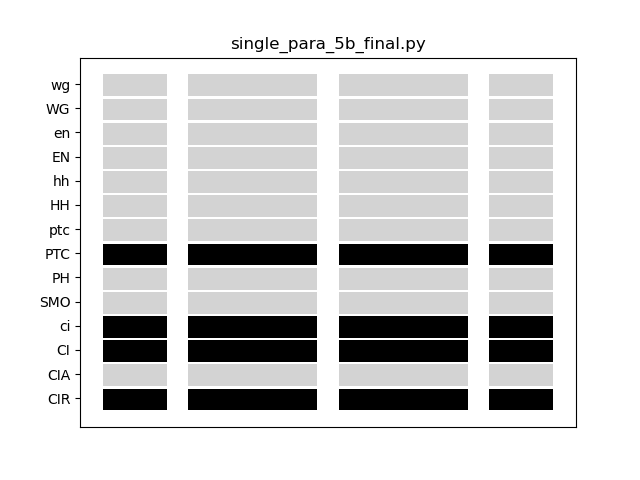


wg:  [0, 0, 0, 0]
WG:  [0, 0, 0, 0]
en:  [1, 0, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 1, 1, 1]
PTC:  [0, 0, 0, 0]
PH:  [0, 0, 0, 0]
SMO:  [0, 0, 0, 0]
ci:  [0, 1, 1, 1]
CI:  [0, 0, 0, 0]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 1 iterations:
wg:  [0, 0, 0, 0]
WG:  [0, 0, 0, 0]
en:  [0, 0, 0, 0]
EN:  [1, 0, 0, 0]
hh:  [0, 0, 0, 0]
HH:  [1, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [0, 1, 1, 1]
PH:  [0, 0, 0, 0]
SMO:  [1, 1, 1, 1]
ci:  [1, 1, 1, 1]
CI:  [0, 1, 1, 1]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 2 iterations:
wg:  [0, 0, 0, 0]
WG:  [0, 0, 0, 0]
en:  [0, 0, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [0, 0, 1, 0]
PH:  [0, 1, 0, 1]
SMO:  [1, 1, 0, 1]
ci:  [0, 1, 1, 1]
CI:  [1, 1, 1, 1]
CIA:  [0, 1, 1, 1]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 3 iterations:
wg:  [0, 0, 0

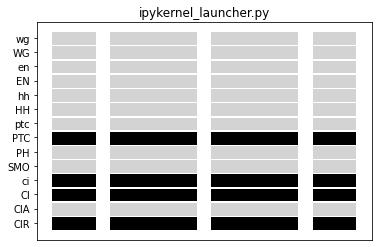

In [ ]:
"""
SOLUTION FOR TASK 4
Initial values are sent to the equations as input. 
Variation added for WG, EN, CI. Changed logic for i-1 and i+1
Before the iteration ends, the calculated values are written over initial values.
In this way, calculated values are initial values for the next iteration.

"""

import matplotlib.pyplot as plt
import sys    
import os    
file_name =  os.path.basename(sys.argv[0])

# Protein name appended by ini is initial state of that protein

slp_ini = [0, 0, 1, 1]
wg_ini = [0, 0, 0, 0] # changed the condition of wg to 0.. if needed do the same with en and hh...
wingless_ini = [0, 0, 0, 0]
en_ini = [1, 0, 0, 0]
engrailed_ini = [0, 0, 0, 0]
hh_ini = [1, 0, 0, 0]
hedgehog_ini = [0, 0, 0, 0]
ptc_ini = [0, 1, 1, 1]
patched_ini = [0, 0, 0, 0]
ph_ini = [0, 0, 0, 0]
smo_ini = [0, 0, 0, 0]
ci_ini = [0, 1, 1, 1]
cubitus_interruptor_ini = [0, 0, 0, 0]
cia_ini = [0, 0, 0, 0]
cir_ini = [0, 0, 0, 0]

def wg(wg0 = wg_ini, cia0 = cia_ini, cir0 = cir_ini):
    """
    **wg**
    Given:
        wg, CIA, CIR
    Equation to solve: 
        wgi = (CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi]
    """
    
    wg_final = list() #Final Array of wg
    
    #First loop for iteration over parasegmants, second loop for cells in the parasegment
    
    for i, cell_value in enumerate(wg0):
        temp_wg = wg0[i]
        tmp_cia = cia0[i]
        tmp_cir = cir0[i]
        tmp_slp = slp_ini[i]
            
        #If equation is true, add 1 to the parasegmant array of wg, else add 0. 
        #breakdown of equation of wg is below:
        bool1 = tmp_cia and tmp_slp and not tmp_cir
        bool2 = tmp_cia or tmp_slp
        bool3 = temp_wg and bool2 and not tmp_cir
        bool4 = bool1 or bool3
        #if (tmp_cia and tmp_slp and not tmp_cir) or (temp_wg and (tmp_cia or tmp_slp) and not tmp_cir):
        if bool4:
            wg_final.append(1)
        else:
            wg_final.append(0)
    
    return wg_final
    
def wingless(wg0 = wg_ini):
    """
        **WG**
    Given:
        wg
    Equation to solve: 
        WGi = wgi 
    """
    return wg0

def en(wingless0 = wingless_ini):
    """
    **en**
    Given:
        WG
    Equation to solve: 
        eni = (WGi−1 or WGi+1) and not SLPi
        
    For WGi−1 and WGi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    en_final = list()
    
    for i, cell_value in enumerate(wingless0):
        if i == 0:
            wg_minus1 = wingless0[3]
        else:
            wg_minus1 = wingless0[i-1]
            
        if i == 3:
            wg_plus1 = wingless0[0]
        else:
            wg_plus1 = wingless0[i+1]

        tmp_slp = slp_ini[i]
            
        bool1 = wg_minus1 or wg_plus1
        bool2 = bool1 and not tmp_slp
        #if ((wg_minus1 or wg_plus1) and not tmp_slp):
        if bool2:
            en_final.append(1)
        else:
            en_final.append(0)
    
    return en_final
    
def engrailed(en0 = en_ini):
    """
    **EN**
    Given:
        en
    Equation to solve: 
        ENi = eni
    """
    return en0

def hh(engrailed0 = engrailed_ini, cir0 = cir_ini):
    """
    **hh**
    Given:
        EN, CIR
    Equation to solve: 
        hhi = ENi and not CIRi
    """
    hh_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
            
        bool1 = tmp_en and not tmp_cir
        #if (tmp_en and not tmp_cir):
        if bool1:
            hh_final.append(1)
        else:
            hh_final.append(0)
    
    return hh_final
    
    
def hedgehog(hh0 = hh_ini):
    """
    **HH**
    Given:
        hh
    Equation to solve: 
        HHi = hhi
    """
    return hh0
    
def ptc(engrailed0 = engrailed_ini, cir0 = cir_ini, cia0 = cia_ini):
    """
    **ptc**
    Given:
        CIA, EN, CIR
    Equation to solve: 
        ptci = CIAi and not ENi and not CIRi
    """
    
    ptc_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
        tmp_cia = cia0[i]
            
        bool1 = tmp_cia and not tmp_en and not tmp_cir
        #if (tmp_cia and not tmp_en and not tmp_cir):
        if bool1:
            ptc_final.append(1)
        else:
            ptc_final.append(0)
    
    return ptc_final
    

def patched_protein(ptc0 = ptc_ini, patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PTC**
    Given:
        ptc, PTC, HH
    Equation to solve: 
        PTCi = ptci or (PTCi and not HHi−1 and not HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    patched_final = list()
    
    for i, cell_value in enumerate(ptc0):
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_ptc = ptc0[i]
        tmp_ptc_pt = patched0[i]
            
            
        bool1 = tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1
        bool2 = tmp_ptc or bool1
        #if (tmp_ptc or (tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1)):
        if bool2:
            patched_final.append(1)
        else:
            patched_final.append(0)
    
    return patched_final    
    
def ph(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PH**
    Given:
        PTC, HH
    Equation to solve: 
        PHi(t) = PTCi and (HHi−1 or HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    ph_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_patched = patched0[i]
            
        bool1 = hedgehog_minus1 or hedgehog_plus1
        bool2 = tmp_patched and bool1
        #if (tmp_patched and (hedgehog_minus1 or hedgehog_plus1)):
        if bool2:
            ph_final.append(1)
        else:
            ph_final.append(0)
    
    return ph_final

def smo(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **SMO**
    Given:
        PTC, HH
    Equation to solve: 
        SMOi(t) = not PTCi or HHi−1 or HHi+1
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    smo_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
        
        tmp_patched = patched0[i]
            
        bool1 = not tmp_patched or hedgehog_minus1 or hedgehog_plus1
        #if (not tmp_patched or hedgehog_minus1 or hedgehog_plus1):
        if bool1:
            smo_final.append(1)
        else:
            smo_final.append(0)
    
    return smo_final
    
def ci(engrailed0 = engrailed_ini):
    """
    **ci**
    Given:
        EN
    Equation to solve: 
        cii = not ENi
    """

    ci_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        ci_final.append(int(not engrailed0[i]))
    
    return ci_final
    
def cubitus_interruptor(ci0 = ci_ini):
    """
    **CI**
    Given:
        ci
    Equation to solve: 
        CIi = cii
    """
    return ci0

def cia(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIA**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIAi = CIi and (SMOi or hhi−1 or hhi+1)
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cia_final = list()
    
    for i, cell_value in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_smo or hh_minus1 or hh_plus1
        bool2 = tmp_cubitus and bool1
        #if (not tmp_cubitus and (tmp_smo or hh_minus1 or hh_plus1)):
        if bool2:
            cia_final.append(1)
        else:
            cia_final.append(0)
    
    return cia_final
    
def cir(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIR**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIRi = CIi and not SMOi and not hhi−1 and not hhi+1
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cir_final = list()
    
    for i, segment in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1 
        #if (tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1):
        if bool1:
            cir_final.append(1)
        else:
            cir_final.append(0)
    
    return cir_final

if __name__ == '__main__':

    print("wg: " , wg_ini)
    print("WG: ", wingless_ini)
    print("en: ", en_ini)
    print("EN: ", engrailed_ini)
    print("hh: ", hh_ini)
    print("HH: ", hedgehog_ini)
    print("ptc: ", ptc_ini)
    print("PTC: ", patched_ini)
    print("PH: ", ph_ini)
    print("SMO: ", smo_ini)
    print("ci: ", ci_ini)
    print("CI: ", cubitus_interruptor_ini)
    print("CIA: ", cia_ini)
    print("CIR: ", cir_ini)
    
    wg0 = wg_ini
    wingless0 = wingless_ini
    en0 = en_ini
    engrailed0 = engrailed_ini
    hh0 = hh_ini
    hedgehog0 = hedgehog_ini
    ptc0 = ptc_ini
    patched0 = patched_ini
    ph0 = ph_ini
    smo0 = smo_ini
    ci0 = ci_ini
    cubitus0 = cubitus_interruptor_ini
    cia0 = cia_ini
    cir0 = cir_ini
    
    #Keeping iteration count high to check steady state. If steady for 6, it will be steady for 20 as well.
    for x in range(20):
        #wg1 = wg(wg0, cia0, cir0)
        #wingless1 = wingless(wg0)
        en1 = en(wingless0)
        engrailed1 = engrailed(en0)
        hh1 = hh(engrailed0, cir0)
        hedgehog1 = hedgehog(hh0)
        ptc1 = ptc(engrailed0, cir0, cia0)
        patched1 = patched_protein(ptc0, patched0, hedgehog0)
        ph1 = ph(patched0, hedgehog0)
        smo1 = smo(patched0, hedgehog0)
        ci1 = ci(engrailed0)
        cubitus1 = cubitus_interruptor(ci0)
        cia1 = cia(cubitus0, smo0, hh0)
        cir1 = cir(cubitus0, smo0, hh0)
        
        #wg0 = wg1
        #wingless0 = wingless1
        en0 = en1
        engrailed0 = engrailed1
        hh0 = hh1
        hedgehog0 = hedgehog1
        ptc0 = ptc1
        patched0 = patched1
        ph0 = ph1
        smo0 = smo1
        ci0 = ci1
        cubitus0 = cubitus1
        cia0 = cia1
        cir0 = cir1
        
        
        print("---------------------------------------------------")
        print("After", x+1, "iterations:")
        print("wg: " , wg0)
        print("WG: ", wingless0)
        print("en: ", en0)
        print("EN: ", engrailed0)
        print("hh: ", hh0)
        print("HH: ", hedgehog0)
        print("ptc: ", ptc0)
        print("PTC: ", patched0)
        print("PH: ", ph0)
        print("SMO: ", smo0)
        print("ci: ", ci0)
        print("CI: ", cubitus0)
        print("CIA: ", cia0)
        print("CIR: ", cir0)
        
    """
    Figure section:
    """
    
    
    wg_graph = [None] * 12
    wingless_graph = [None] * 12
    en_graph = [None] * 12
    engrailed_graph = [None] * 12
    hh_graph = [None] * 12
    hedgehog_graph = [None] * 12
    ptc_graph = [None] * 12
    patched_graph = [None] * 12
    ph_graph = [None] * 12
    smo_graph = [None] * 12
    ci_graph = [None] * 12
    cubitus_graph = [None] * 12
    cia_graph = [None] * 12
    cir_graph = [None] * 12
    
    bar_graph = [(10,15), (25,15), (50,15), (65,15), (80,15), (95,15), (120,15), (135,15), (150,15), (165,15), (190,15), (205,15)]
    for i, segment in enumerate(wg0):
        if wg0[i] == 1:
            wg_graph[i+2] = 'black'
            wg_graph[i+6] = 'black'
            wg_graph[i-2] = 'black'
        else:
            wg_graph[i+2] = 'lightgrey'
            wg_graph[i+6] = 'lightgrey'
            wg_graph[i-2] = 'lightgrey'
            
        if wingless0[i] == 1:
            wingless_graph[i+2] = 'black'
            wingless_graph[i+6] = 'black'
            wingless_graph[i-2] = 'black'
        else:
            wingless_graph[i+2] = 'lightgrey'
            wingless_graph[i+6] = 'lightgrey'
            wingless_graph[i-2] = 'lightgrey'
        
        if en0[i] == 1:
            en_graph[i+2] = 'black'
            en_graph[i+6] = 'black'
            en_graph[i-2] = 'black'
        else:
            en_graph[i+2] = 'lightgrey'
            en_graph[i+6] = 'lightgrey'
            en_graph[i-2] = 'lightgrey'
        
        if engrailed0[i] == 1:
            engrailed_graph[i+2] = 'black'
            engrailed_graph[i+6] = 'black'
            engrailed_graph[i-2] = 'black'
        else:
            engrailed_graph[i+2] = 'lightgrey'
            engrailed_graph[i+6] = 'lightgrey'
            engrailed_graph[i-2] = 'lightgrey'
        
        if hh0[i] == 1:
            hh_graph[i+2] = 'black'
            hh_graph[i+6] = 'black'
            hh_graph[i-2] = 'black'
        else:
            hh_graph[i+2] = 'lightgrey'
            hh_graph[i+6] = 'lightgrey'
            hh_graph[i-2] = 'lightgrey'
        
        if hedgehog0[i] == 1:
            hedgehog_graph[i+2] = 'black'
            hedgehog_graph[i+6] = 'black'
            hedgehog_graph[i-2] = 'black'
        else:
            hedgehog_graph[i+2] = 'lightgrey'
            hedgehog_graph[i+6] = 'lightgrey'
            hedgehog_graph[i-2] = 'lightgrey'
        
        if ptc0[i] == 1:
            ptc_graph[i+2] = 'black'
            ptc_graph[i+6] = 'black'
            ptc_graph[i-2] = 'black'
        else:
            ptc_graph[i+2] = 'lightgrey'
            ptc_graph[i+6] = 'lightgrey'
            ptc_graph[i-2] = 'lightgrey'
        
        if patched0[i] == 1:
            patched_graph[i+2] = 'black'
            patched_graph[i+6] = 'black'
            patched_graph[i-2] = 'black'
        else:
            patched_graph[i+2] = 'lightgrey'
            patched_graph[i+6] = 'lightgrey'
            patched_graph[i-2] = 'lightgrey'
        
        if ph0[i] == 1:
            ph_graph[i+2] = 'black'
            ph_graph[i+6] = 'black'
            ph_graph[i-2] = 'black'
        else:
            ph_graph[i+2] = 'lightgrey'
            ph_graph[i+6] = 'lightgrey'
            ph_graph[i-2] = 'lightgrey'
        
        if smo0[i] == 1:
            smo_graph[i+2] = 'black'
            smo_graph[i+6] = 'black'
            smo_graph[i-2] = 'black'
        else:
            smo_graph[i+2] = 'lightgrey'
            smo_graph[i+6] = 'lightgrey'
            smo_graph[i-2] = 'lightgrey'
        
        if ci0[i] == 1:
            ci_graph[i+2] = 'black'
            ci_graph[i+6] = 'black'
            ci_graph[i-2] = 'black'
        else:
            ci_graph[i+2] = 'lightgrey'
            ci_graph[i+6] = 'lightgrey'
            ci_graph[i-2] = 'lightgrey'
        
        if cubitus0[i] == 1:
            cubitus_graph[i+2] = 'black'
            cubitus_graph[i+6] = 'black'
            cubitus_graph[i-2] = 'black'
        else:
            cubitus_graph[i+2] = 'lightgrey'
            cubitus_graph[i+6] = 'lightgrey'
            cubitus_graph[i-2] = 'lightgrey'
        
        if cia0[i] == 1:
            cia_graph[i+2] = 'black'
            cia_graph[i+6] = 'black'
            cia_graph[i-2] = 'black'
        else:
            cia_graph[i+2] = 'lightgrey'
            cia_graph[i+6] = 'lightgrey'
            cia_graph[i-2] = 'lightgrey'
        
        if cir0[i] == 1:
            cir_graph[i+2] = 'black'
            cir_graph[i+6] = 'black'
            cir_graph[i-2] = 'black'
        else:
            cir_graph[i+2] = 'lightgrey'
            cir_graph[i+6] = 'lightgrey'
            cir_graph[i-2] = 'lightgrey'
            
    fig , ax= plt.subplots()
    
    ax.broken_barh(bar_graph, (140, 9), facecolors = wg_graph)
    ax.broken_barh(bar_graph, (130, 9), facecolors = wingless_graph)
    ax.broken_barh(bar_graph, (120, 9), facecolors = en_graph)
    ax.broken_barh(bar_graph, (110, 9), facecolors = engrailed_graph)
    ax.broken_barh(bar_graph, (100, 9), facecolors = hh_graph)
    ax.broken_barh(bar_graph, (90, 9), facecolors = hedgehog_graph)
    ax.broken_barh(bar_graph, (80, 9), facecolors = ptc_graph)
    ax.broken_barh(bar_graph, (70, 9), facecolors = patched_graph)
    ax.broken_barh(bar_graph, (60, 9), facecolors = ph_graph)
    ax.broken_barh(bar_graph, (50, 9), facecolors = smo_graph)
    ax.broken_barh(bar_graph, (40, 9), facecolors = ci_graph)
    ax.broken_barh(bar_graph, (30, 9), facecolors = cubitus_graph)
    ax.broken_barh(bar_graph, (20, 9), facecolors = cia_graph)
    ax.broken_barh(bar_graph, (10, 9), facecolors = cir_graph)
    ax.set_yticks([15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145])

    ax.set_yticklabels(['CIR', 'CIA', 'CI', 'ci', 'SMO', 'PH', 'PTC', 'ptc', 'HH', 'hh', 'EN', 'en', 'WG', 'wg'])
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.title(file_name)
    plt.show()

**Task 5**

Solving equation 2 for all the possible states (2^6= 64) of wg and PTC generates 10 solutions that creates a stable expression pattern.
Obatin expression pattern of wg and PTC for all the states and confirm/highlight the following 10 solutions:

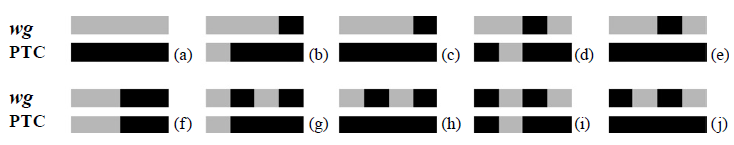

In [ ]:
"""SOLUTION FOR TASK 5"""
def wg_eq4(wg0):
    """
        wg1 = wg1 and not wg2 and not wg4;
        wg2 = wg2 and not wg1 and not wg3;
        wg3 = wg1 or wg3;
        wg4 = wg2 or wg4;
    
    """
    
    wg_final = list() #Final Array of wg
    
    wg_final.clear()
    #Loop for iteration over parasegmants
    wg_final.append(int(wg0[0] and not wg0[1] and not wg0[3]))
    wg_final.append(int(wg0[1] and not wg0[0] and not wg0[2]))
    wg_final.append(int(wg0[0] or wg0[2]))
    wg_final.append(int(wg0[1] or wg0[3]))
            
    return wg_final

def ptc_eq4(ptc0, wg0):

    """
    PTC1 = (not wg2 and not wg4) or (PTC1 and not wg1 and not wg3)
    PTC2 = (not wg1 and not wg3) or (PTC2 and not wg2 and not wg4)
    PTC3 = 1
    PTC4 = 1
    """
    
    ptc_final = list() #Final Array of wg
    
    #Loop for iteration over parasegmants
    ptc_final.clear()
    bool1 = (not wg0[1] and not wg0[3]) or (ptc0[0] and not wg0[0] and not wg0[2])
    bool2 = (not wg0[0] and not wg0[2]) or (ptc0[1] and not wg0[1] and not wg0[3])
    ptc_final.append(int(bool1))
    ptc_final.append(int(bool2))
    ptc_final.append(1)
    ptc_final.append(1)
    
    return ptc_final
    
    

if __name__ == '__main__':
    
    output = [[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 1, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 1, 0, 1, 0, 1, 1], [0, 0, 1, 0, 1, 1, 1, 1],
              [0, 0, 1, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1], [0, 1, 0, 1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 1], [1, 0, 1, 0, 1, 1, 1, 1]]

    for i in range(64):
        pattern = [int(x) for x in '{:06b}'.format(i)]
        
        wg0 = pattern[:4]
        patched0 = pattern[4:]
        
        patched0.append(1)
        patched0.append(1)
        
        wg1 = wg_eq4(wg0)
        patched1 = ptc_eq4(patched0, wg0)
        
        combo = wg1 + patched1
        
        if combo in output:
            print("input:", wg0, patched0, "output:", wg1, patched1, "matches with figure 6:", chr(output.index(combo)+97))
        

input: [0, 0, 0, 0] [0, 0, 1, 1] output: [0, 0, 0, 0] [1, 1, 1, 1] matches with figure 6: a
input: [0, 0, 0, 0] [0, 1, 1, 1] output: [0, 0, 0, 0] [1, 1, 1, 1] matches with figure 6: a
input: [0, 0, 0, 0] [1, 0, 1, 1] output: [0, 0, 0, 0] [1, 1, 1, 1] matches with figure 6: a
input: [0, 0, 0, 0] [1, 1, 1, 1] output: [0, 0, 0, 0] [1, 1, 1, 1] matches with figure 6: a
input: [0, 0, 0, 1] [0, 0, 1, 1] output: [0, 0, 0, 1] [0, 1, 1, 1] matches with figure 6: b
input: [0, 0, 0, 1] [0, 1, 1, 1] output: [0, 0, 0, 1] [0, 1, 1, 1] matches with figure 6: b
input: [0, 0, 0, 1] [1, 0, 1, 1] output: [0, 0, 0, 1] [1, 1, 1, 1] matches with figure 6: c
input: [0, 0, 0, 1] [1, 1, 1, 1] output: [0, 0, 0, 1] [1, 1, 1, 1] matches with figure 6: c
input: [0, 0, 1, 0] [0, 0, 1, 1] output: [0, 0, 1, 0] [1, 0, 1, 1] matches with figure 6: d
input: [0, 0, 1, 0] [0, 1, 1, 1] output: [0, 0, 1, 0] [1, 1, 1, 1] matches with figure 6: e
input: [0, 0, 1, 0] [1, 0, 1, 1] output: [0, 0, 1, 0] [1, 0, 1, 1] matches with 

**Task 6**

Obtain the expression pattern for the gene network if the wg stripe is doubled or two wg stripe are expressed in a parasegment.  

**Hint:** 
Use one of the stable pattern of wg and PTC, obtained in task 5 and solve equation 1 and 2. 

Expected output: 

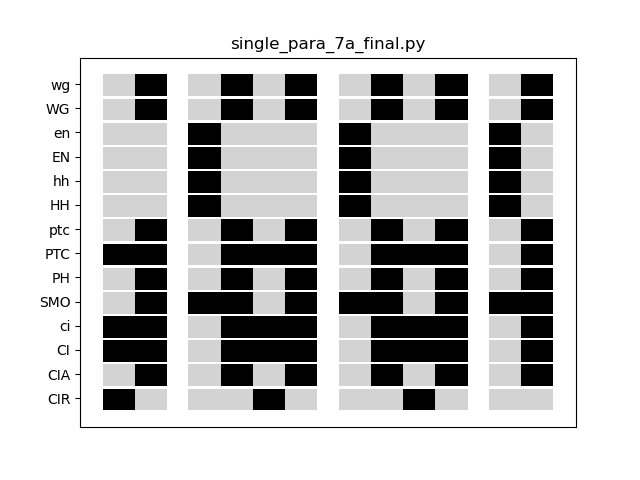

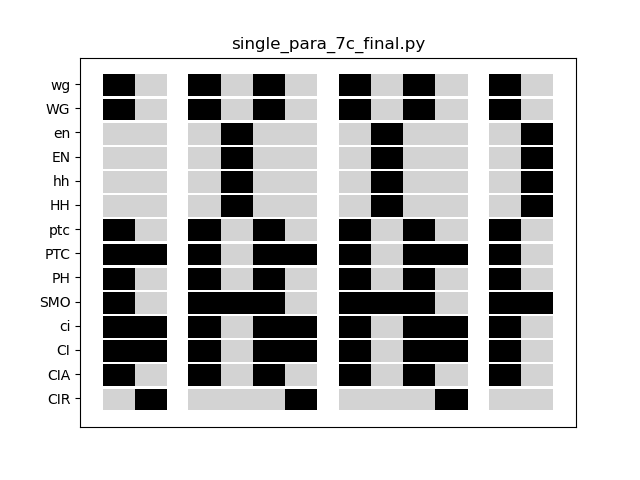

wg:  [0, 1, 0, 1]
WG:  [0, 0, 0, 0]
en:  [1, 0, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 1, 1, 1]
PTC:  [0, 1, 1, 1]
PH:  [0, 0, 0, 0]
SMO:  [0, 0, 0, 0]
ci:  [0, 1, 1, 1]
CI:  [0, 0, 0, 0]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 1 iterations:
wg:  [0, 1, 0, 1]
WG:  [0, 1, 0, 1]
en:  [0, 0, 0, 0]
EN:  [1, 0, 0, 0]
hh:  [0, 0, 0, 0]
HH:  [1, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [0, 1, 1, 1]
PH:  [0, 0, 0, 0]
SMO:  [1, 0, 0, 0]
ci:  [1, 1, 1, 1]
CI:  [0, 1, 1, 1]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 2 iterations:
wg:  [0, 1, 0, 1]
WG:  [0, 1, 0, 1]
en:  [1, 0, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [0, 1, 1, 1]
PH:  [0, 1, 0, 1]
SMO:  [1, 1, 0, 1]
ci:  [0, 1, 1, 1]
CI:  [1, 1, 1, 1]
CIA:  [0, 0, 0, 0]
CIR:  [0, 1, 1, 1]
---------------------------------------------------
After 3 iterations:
wg:  [0, 1, 0

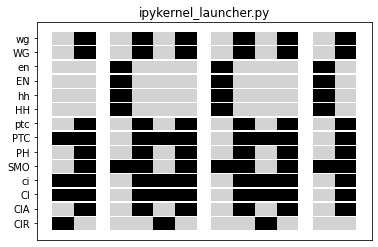

In [ ]:
"""
SOLUTION FOR TASK 6A
Initial values are sent to the equations as input. 
Variation added for WG, EN, CI. Changed logic for i-1 and i+1
Before the iteration ends, the calculated values are written over initial values.
In this way, calculated values are initial values for the next iteration.

"""

import matplotlib.pyplot as plt
import sys    
import os    
file_name =  os.path.basename(sys.argv[0])

# Protein name appended by ini is initial state of that protein

#7(a)
slp_ini = [0, 0, 1, 1]
wg_ini = [0, 1, 0, 1]
wingless_ini = [0, 0, 0, 0]
en_ini = [1, 0, 0, 0]
engrailed_ini = [0, 0, 0, 0]
hh_ini = [1, 0, 0, 0]
hedgehog_ini = [0, 0, 0, 0]
ptc_ini = [0, 1, 1, 1]
patched_ini = [0, 1, 1, 1]
ph_ini = [0, 0, 0, 0]
smo_ini = [0, 0, 0, 0]
ci_ini = [0, 1, 1, 1]
cubitus_interruptor_ini = [0, 0, 0, 0]
cia_ini = [0, 0, 0, 0]
cir_ini = [0, 0, 0, 0]

def wg(wg0 = wg_ini, cia0 = cia_ini, cir0 = cir_ini):
    """
    **wg**
    Given:
        wg, CIA, CIR
    Equation to solve: 
        wgi = (CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi]
    """
    
    wg_final = list() #Final Array of wg
    
    #First loop for iteration over parasegmants, second loop for cells in the parasegment
    
    for i, cell_value in enumerate(wg0):
        temp_wg = wg0[i]
        tmp_cia = cia0[i]
        tmp_cir = cir0[i]
        tmp_slp = slp_ini[i]
            
        #If equation is true, add 1 to the parasegmant array of wg, else add 0. 
        #breakdown of equation of wg is below:
        bool1 = tmp_cia and tmp_slp and not tmp_cir
        bool2 = tmp_cia or tmp_slp
        bool3 = temp_wg and bool2 and not tmp_cir
        bool4 = bool1 or bool3
        #if (tmp_cia and tmp_slp and not tmp_cir) or (temp_wg and (tmp_cia or tmp_slp) and not tmp_cir):
        if bool4:
            wg_final.append(1)
        else:
            wg_final.append(0)
    
    return wg_final
    
def wg_eq4(wg0 = wg_ini):
    """
        wg1 = wg1 and not wg2 and not wg4;
        wg2 = wg2 and not wg1 and not wg3;
        wg3 = wg1 or wg3;
        wg4 = wg2 or wg4;
    
    """
    
    wg_final = list() #Final Array of wg
    
    wg_final.clear()
    #Loop for iteration over parasegmants
    wg_final.append(int(wg0[0] and not wg0[1] and not wg0[3]))
    wg_final.append(int(wg0[1] and not wg0[0] and not wg0[2]))
    wg_final.append(int(wg0[0] or wg0[2]))
    wg_final.append(int(wg0[1] or wg0[3]))
            
    return wg_final
    
def wingless(wg0 = wg_ini):
    """
        **WG**
    Given:
        wg
    Equation to solve: 
        WGi = wgi 
    """
    return wg0

def en(wingless0 = wingless_ini):
    """
    **en**
    Given:
        WG
    Equation to solve: 
        eni = (WGi−1 or WGi+1) and not SLPi
        
    For WGi−1 and WGi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    en_final = list()
    
    for i, cell_value in enumerate(wingless0):
        if i == 0:
            wg_minus1 = wingless0[3]
        else:
            wg_minus1 = wingless0[i-1]
            
        if i == 3:
            wg_plus1 = wingless0[0]
        else:
            wg_plus1 = wingless0[i+1]

        tmp_slp = slp_ini[i]
            
        bool1 = wg_minus1 or wg_plus1
        bool2 = bool1 and not tmp_slp
        #if ((wg_minus1 or wg_plus1) and not tmp_slp):
        if bool2:
            en_final.append(1)
        else:
            en_final.append(0)
    
    return en_final
    
def engrailed(en0 = en_ini):
    """
    **EN**
    Given:
        en
    Equation to solve: 
        ENi = eni
    """
    return en0

def hh(engrailed0 = engrailed_ini, cir0 = cir_ini):
    """
    **hh**
    Given:
        EN, CIR
    Equation to solve: 
        hhi = ENi and not CIRi
    """
    hh_final = list()

    for i, cell_value in enumerate(engrailed0):
        
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
            
        bool1 = tmp_en and not tmp_cir
        #if (tmp_en and not tmp_cir):
        if bool1:
            hh_final.append(1)
        else:
            hh_final.append(0)
    
    return hh_final
    
    
def hedgehog(hh0 = hh_ini):
    """
    **HH**
    Given:
        hh
    Equation to solve: 
        HHi = hhi
    """
    return hh0
    
def ptc(engrailed0 = engrailed_ini, cir0 = cir_ini, cia0 = cia_ini):
    """
    **ptc**
    Given:
        CIA, EN, CIR
    Equation to solve: 
        ptci = CIAi and not ENi and not CIRi
    """
    
    ptc_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
        tmp_cia = cia0[i]
            
        bool1 = tmp_cia and not tmp_en and not tmp_cir
        #if (tmp_cia and not tmp_en and not tmp_cir):
        if bool1:
            ptc_final.append(1)
        else:
            ptc_final.append(0)
    
    return ptc_final
    
def ptc_eq4(ptc0 = patched_ini, wg0 = wg_ini):

    """
    PTC1 = (not wg2 and not wg4) or (PTC1 and not wg1 and not wg3)
    PTC2 = (not wg1 and not wg3) or (PTC2 and not wg2 and not wg4)
    PTC3 = 1
    PTC4 = 1
    """
    
    ptc_final = list() #Final Array of wg
    
    #Loop for iteration over parasegmants
    ptc_final.clear()
    bool1 = (not wg0[1] and not wg0[3]) or (ptc0[0] and not wg0[0] and not wg0[2])
    bool2 = (not wg0[0] and not wg0[2]) or (ptc0[1] and not wg0[1] and not wg0[3])
    ptc_final.append(int(bool1))
    ptc_final.append(int(bool2))
    ptc_final.append(1)
    ptc_final.append(1)
    
    return ptc_final
    

    

def patched_protein(ptc0 = ptc_ini, patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PTC**
    Given:
        ptc, PTC, HH
    Equation to solve: 
        PTCi = ptci or (PTCi and not HHi−1 and not HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    patched_final = list()
    
    for i, cell_value in enumerate(ptc0):
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_ptc = ptc0[i]
        tmp_ptc_pt = patched0[i]
            
            
        bool1 = tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1
        bool2 = tmp_ptc or bool1
        #if (tmp_ptc or (tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1)):
        if bool2:
            patched_final.append(1)
        else:
            patched_final.append(0)
    
    return patched_final    
    
def ph(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PH**
    Given:
        PTC, HH
    Equation to solve: 
        PHi(t) = PTCi and (HHi−1 or HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    ph_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_patched = patched0[i]
            
        bool1 = hedgehog_minus1 or hedgehog_plus1
        bool2 = tmp_patched and bool1
        #if (tmp_patched and (hedgehog_minus1 or hedgehog_plus1)):
        if bool2:
            ph_final.append(1)
        else:
            ph_final.append(0)
    
    return ph_final

def smo(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **SMO**
    Given:
        PTC, HH
    Equation to solve: 
        SMOi(t) = not PTCi or HHi−1 or HHi+1
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    smo_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
        
        tmp_patched = patched0[i]
            
        bool1 = not tmp_patched or hedgehog_minus1 or hedgehog_plus1
        #if (not tmp_patched or hedgehog_minus1 or hedgehog_plus1):
        if bool1:
            smo_final.append(1)
        else:
            smo_final.append(0)
    
    return smo_final
    
def ci(engrailed0 = engrailed_ini):
    """
    **ci**
    Given:
        EN
    Equation to solve: 
        cii = not ENi
    """

    ci_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        ci_final.append(int(not engrailed0[i]))
    
    return ci_final
    
def cubitus_interruptor(ci0 = ci_ini):
    """
    **CI**
    Given:
        ci
    Equation to solve: 
        CIi = cii
    """
    return ci0

def cia(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIA**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIAi = CIi and (SMOi or hhi−1 or hhi+1)
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cia_final = list()
    
    for i, cell_value in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_smo or hh_minus1 or hh_plus1
        bool2 = tmp_cubitus and bool1
        #if (not tmp_cubitus and (tmp_smo or hh_minus1 or hh_plus1)):
        if bool2:
            cia_final.append(1)
        else:
            cia_final.append(0)
    
    return cia_final
    
def cir(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIR**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIRi = CIi and not SMOi and not hhi−1 and not hhi+1
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cir_final = list()
    
    for i, segment in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1 
        #if (tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1):
        if bool1:
            cir_final.append(1)
        else:
            cir_final.append(0)
    
    return cir_final

if __name__ == '__main__':

    print("wg: " , wg_ini)
    print("WG: ", wingless_ini)
    print("en: ", en_ini)
    print("EN: ", engrailed_ini)
    print("hh: ", hh_ini)
    print("HH: ", hedgehog_ini)
    print("ptc: ", ptc_ini)
    print("PTC: ", patched_ini)
    print("PH: ", ph_ini)
    print("SMO: ", smo_ini)
    print("ci: ", ci_ini)
    print("CI: ", cubitus_interruptor_ini)
    print("CIA: ", cia_ini)
    print("CIR: ", cir_ini)
    
    wg0 = wg_ini
    wingless0 = wingless_ini
    en0 = en_ini
    engrailed0 = engrailed_ini
    hh0 = hh_ini
    hedgehog0 = hedgehog_ini
    ptc0 = ptc_ini
    patched0 = patched_ini
    ph0 = ph_ini
    smo0 = smo_ini
    ci0 = ci_ini
    cubitus0 = cubitus_interruptor_ini
    cia0 = cia_ini
    cir0 = cir_ini
    
    #Keeping iteration count high to check steady state. If steady for 6, it will be steady for 20 as well.
    for x in range(20):
        #wg1 = wg(wg0, cia0, cir0)
        wg1 = wg_eq4(wg0)
        wingless1 = wingless(wg1)
        en1 = en(wingless0)
        engrailed1 = engrailed(en0)
        hh1 = hh(engrailed0, cir0)
        hedgehog1 = hedgehog(hh0)
        ptc1 = ptc(engrailed0, cir0, cia0)
        #patched1 = patched_protein(ptc0, patched0, hedgehog0) 
        patched1 = ptc_eq4(patched0, wg0)
        ph1 = ph(patched0, hedgehog0) 
        smo1 = smo(patched0, hedgehog0)
        ci1 = ci(engrailed0)
        cubitus1 = cubitus_interruptor(ci0)
        cia1 = cia(cubitus0, smo0, hh0) 
        cir1 = cir(cubitus0, smo0, hh0) 
        
        wg0 = wg1
        wingless0 = wingless1
        en0 = en1
        engrailed0 = engrailed1
        hh0 = hh1
        hedgehog0 = hedgehog1
        ptc0 = ptc1
        patched0 = patched1
        ph0 = ph1
        smo0 = smo1
        ci0 = ci1
        cubitus0 = cubitus1
        cia0 = cia1
        cir0 = cir1
        
        
        print("---------------------------------------------------")
        print("After", x+1, "iterations:")
        print("wg: " , wg0)
        print("WG: ", wingless0)
        print("en: ", en0)
        print("EN: ", engrailed0)
        print("hh: ", hh0)
        print("HH: ", hedgehog0)
        print("ptc: ", ptc0)
        print("PTC: ", patched0)
        print("PH: ", ph0)
        print("SMO: ", smo0)
        print("ci: ", ci0)
        print("CI: ", cubitus0)
        print("CIA: ", cia0)
        print("CIR: ", cir0)
        
    """
    Figure section:
    """
    
    
    wg_graph = [None] * 12
    wingless_graph = [None] * 12
    en_graph = [None] * 12
    engrailed_graph = [None] * 12
    hh_graph = [None] * 12
    hedgehog_graph = [None] * 12
    ptc_graph = [None] * 12
    patched_graph = [None] * 12
    ph_graph = [None] * 12
    smo_graph = [None] * 12
    ci_graph = [None] * 12
    cubitus_graph = [None] * 12
    cia_graph = [None] * 12
    cir_graph = [None] * 12
    
    bar_graph = [(10,15), (25,15), (50,15), (65,15), (80,15), (95,15), (120,15), (135,15), (150,15), (165,15), (190,15), (205,15)]
    for i, segment in enumerate(wg0):
        if wg0[i] == 1:
            wg_graph[i+2] = 'black'
            wg_graph[i+6] = 'black'
            wg_graph[i-2] = 'black'
        else:
            wg_graph[i+2] = 'lightgrey'
            wg_graph[i+6] = 'lightgrey'
            wg_graph[i-2] = 'lightgrey'
            
        if wingless0[i] == 1:
            wingless_graph[i+2] = 'black'
            wingless_graph[i+6] = 'black'
            wingless_graph[i-2] = 'black'
        else:
            wingless_graph[i+2] = 'lightgrey'
            wingless_graph[i+6] = 'lightgrey'
            wingless_graph[i-2] = 'lightgrey'
        
        if en0[i] == 1:
            en_graph[i+2] = 'black'
            en_graph[i+6] = 'black'
            en_graph[i-2] = 'black'
        else:
            en_graph[i+2] = 'lightgrey'
            en_graph[i+6] = 'lightgrey'
            en_graph[i-2] = 'lightgrey'
        
        if engrailed0[i] == 1:
            engrailed_graph[i+2] = 'black'
            engrailed_graph[i+6] = 'black'
            engrailed_graph[i-2] = 'black'
        else:
            engrailed_graph[i+2] = 'lightgrey'
            engrailed_graph[i+6] = 'lightgrey'
            engrailed_graph[i-2] = 'lightgrey'
        
        if hh0[i] == 1:
            hh_graph[i+2] = 'black'
            hh_graph[i+6] = 'black'
            hh_graph[i-2] = 'black'
        else:
            hh_graph[i+2] = 'lightgrey'
            hh_graph[i+6] = 'lightgrey'
            hh_graph[i-2] = 'lightgrey'
        
        if hedgehog0[i] == 1:
            hedgehog_graph[i+2] = 'black'
            hedgehog_graph[i+6] = 'black'
            hedgehog_graph[i-2] = 'black'
        else:
            hedgehog_graph[i+2] = 'lightgrey'
            hedgehog_graph[i+6] = 'lightgrey'
            hedgehog_graph[i-2] = 'lightgrey'
        
        if ptc0[i] == 1:
            ptc_graph[i+2] = 'black'
            ptc_graph[i+6] = 'black'
            ptc_graph[i-2] = 'black'
        else:
            ptc_graph[i+2] = 'lightgrey'
            ptc_graph[i+6] = 'lightgrey'
            ptc_graph[i-2] = 'lightgrey'
        
        if patched0[i] == 1:
            patched_graph[i+2] = 'black'
            patched_graph[i+6] = 'black'
            patched_graph[i-2] = 'black'
        else:
            patched_graph[i+2] = 'lightgrey'
            patched_graph[i+6] = 'lightgrey'
            patched_graph[i-2] = 'lightgrey'
        
        if ph0[i] == 1:
            ph_graph[i+2] = 'black'
            ph_graph[i+6] = 'black'
            ph_graph[i-2] = 'black'
        else:
            ph_graph[i+2] = 'lightgrey'
            ph_graph[i+6] = 'lightgrey'
            ph_graph[i-2] = 'lightgrey'
        
        if smo0[i] == 1:
            smo_graph[i+2] = 'black'
            smo_graph[i+6] = 'black'
            smo_graph[i-2] = 'black'
        else:
            smo_graph[i+2] = 'lightgrey'
            smo_graph[i+6] = 'lightgrey'
            smo_graph[i-2] = 'lightgrey'
        
        if ci0[i] == 1:
            ci_graph[i+2] = 'black'
            ci_graph[i+6] = 'black'
            ci_graph[i-2] = 'black'
        else:
            ci_graph[i+2] = 'lightgrey'
            ci_graph[i+6] = 'lightgrey'
            ci_graph[i-2] = 'lightgrey'
        
        if cubitus0[i] == 1:
            cubitus_graph[i+2] = 'black'
            cubitus_graph[i+6] = 'black'
            cubitus_graph[i-2] = 'black'
        else:
            cubitus_graph[i+2] = 'lightgrey'
            cubitus_graph[i+6] = 'lightgrey'
            cubitus_graph[i-2] = 'lightgrey'
        
        if cia0[i] == 1:
            cia_graph[i+2] = 'black'
            cia_graph[i+6] = 'black'
            cia_graph[i-2] = 'black'
        else:
            cia_graph[i+2] = 'lightgrey'
            cia_graph[i+6] = 'lightgrey'
            cia_graph[i-2] = 'lightgrey'
        
        if cir0[i] == 1:
            cir_graph[i+2] = 'black'
            cir_graph[i+6] = 'black'
            cir_graph[i-2] = 'black'
        else:
            cir_graph[i+2] = 'lightgrey'
            cir_graph[i+6] = 'lightgrey'
            cir_graph[i-2] = 'lightgrey'
            
    fig , ax= plt.subplots()
    
    ax.broken_barh(bar_graph, (140, 9), facecolors = wg_graph)
    ax.broken_barh(bar_graph, (130, 9), facecolors = wingless_graph)
    ax.broken_barh(bar_graph, (120, 9), facecolors = en_graph)
    ax.broken_barh(bar_graph, (110, 9), facecolors = engrailed_graph)
    ax.broken_barh(bar_graph, (100, 9), facecolors = hh_graph)
    ax.broken_barh(bar_graph, (90, 9), facecolors = hedgehog_graph)
    ax.broken_barh(bar_graph, (80, 9), facecolors = ptc_graph)
    ax.broken_barh(bar_graph, (70, 9), facecolors = patched_graph)
    ax.broken_barh(bar_graph, (60, 9), facecolors = ph_graph)
    ax.broken_barh(bar_graph, (50, 9), facecolors = smo_graph)
    ax.broken_barh(bar_graph, (40, 9), facecolors = ci_graph)
    ax.broken_barh(bar_graph, (30, 9), facecolors = cubitus_graph)
    ax.broken_barh(bar_graph, (20, 9), facecolors = cia_graph)
    ax.broken_barh(bar_graph, (10, 9), facecolors = cir_graph)
    ax.set_yticks([15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145])

    ax.set_yticklabels(['CIR', 'CIA', 'CI', 'ci', 'SMO', 'PH', 'PTC', 'ptc', 'HH', 'hh', 'EN', 'en', 'WG', 'wg'])
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.title(file_name)
    plt.show()

wg:  [1, 0, 1, 0]
WG:  [0, 0, 0, 0]
en:  [1, 0, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 1, 1, 1]
PTC:  [1, 0, 1, 1]
PH:  [0, 0, 0, 0]
SMO:  [0, 0, 0, 0]
ci:  [0, 1, 1, 1]
CI:  [0, 0, 0, 0]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 1 iterations:
wg:  [1, 0, 1, 0]
WG:  [1, 0, 1, 0]
en:  [0, 0, 0, 0]
EN:  [1, 0, 0, 0]
hh:  [0, 0, 0, 0]
HH:  [1, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [1, 0, 1, 1]
PH:  [0, 0, 0, 0]
SMO:  [0, 1, 0, 0]
ci:  [1, 1, 1, 1]
CI:  [0, 1, 1, 1]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 2 iterations:
wg:  [1, 0, 1, 0]
WG:  [1, 0, 1, 0]
en:  [0, 1, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [1, 0, 1, 1]
PH:  [0, 0, 0, 1]
SMO:  [0, 1, 0, 1]
ci:  [0, 1, 1, 1]
CI:  [1, 1, 1, 1]
CIA:  [0, 1, 0, 0]
CIR:  [0, 0, 1, 1]
---------------------------------------------------
After 3 iterations:
wg:  [1, 0, 1

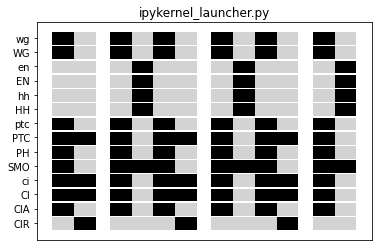

In [ ]:
"""
SOLUTION FOR TASK 6B
Initial values are sent to the equations as input. 
Variation added for WG, EN, CI. Changed logic for i-1 and i+1
Before the iteration ends, the calculated values are written over initial values.
In this way, calculated values are initial values for the next iteration.

"""

import matplotlib.pyplot as plt
import sys    
import os    
file_name =  os.path.basename(sys.argv[0])

# Protein name appended by ini is initial state of that protein

slp_ini = [0, 0, 1, 1]
wg_ini = [1, 0, 1, 0]
wingless_ini = [0, 0, 0, 0]
en_ini = [1, 0, 0, 0]
engrailed_ini = [0, 0, 0, 0]
hh_ini = [1, 0, 0, 0]
hedgehog_ini = [0, 0, 0, 0]
ptc_ini = [0, 1, 1, 1]
patched_ini = [1, 0, 1, 1]
ph_ini = [0, 0, 0, 0]
smo_ini = [0, 0, 0, 0]
ci_ini = [0, 1, 1, 1]
cubitus_interruptor_ini = [0, 0, 0, 0]
cia_ini = [0, 0, 0, 0]
cir_ini = [0, 0, 0, 0]

def wg(wg0 = wg_ini, cia0 = cia_ini, cir0 = cir_ini):
    """
    **wg**
    Given:
        wg, CIA, CIR
    Equation to solve: 
        wgi = (CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi]
    """
    
    wg_final = list() #Final Array of wg
    
    #First loop for iteration over parasegmants, second loop for cells in the parasegment
    
    for i, cell_value in enumerate(wg0):
        temp_wg = wg0[i]
        tmp_cia = cia0[i]
        tmp_cir = cir0[i]
        tmp_slp = slp_ini[i]
            
        #If equation is true, add 1 to the parasegmant array of wg, else add 0. 
        #breakdown of equation of wg is below:
        bool1 = tmp_cia and tmp_slp and not tmp_cir
        bool2 = tmp_cia or tmp_slp
        bool3 = temp_wg and bool2 and not tmp_cir
        bool4 = bool1 or bool3
        #if (tmp_cia and tmp_slp and not tmp_cir) or (temp_wg and (tmp_cia or tmp_slp) and not tmp_cir):
        if bool4:
            wg_final.append(1)
        else:
            wg_final.append(0)
    
    return wg_final
    
def wg_eq4(wg0 = wg_ini):
    """
        wg1 = wg1 and not wg2 and not wg4;
        wg2 = wg2 and not wg1 and not wg3;
        wg3 = wg1 or wg3;
        wg4 = wg2 or wg4;
    
    """
    
    wg_final = list() #Final Array of wg
    
    wg_final.clear()
    #Loop for iteration over parasegmants
    wg_final.append(int(wg0[0] and not wg0[1] and not wg0[3]))
    wg_final.append(int(wg0[1] and not wg0[0] and not wg0[2]))
    wg_final.append(int(wg0[0] or wg0[2]))
    wg_final.append(int(wg0[1] or wg0[3]))
            
    return wg_final
    
def wingless(wg0 = wg_ini):
    """
        **WG**
    Given:
        wg
    Equation to solve: 
        WGi = wgi 
    """
    return wg0

def en(wingless0 = wingless_ini):
    """
    **en**
    Given:
        WG
    Equation to solve: 
        eni = (WGi−1 or WGi+1) and not SLPi
        
    For WGi−1 and WGi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    en_final = list()
    
    for i, cell_value in enumerate(wingless0):
        if i == 0:
            wg_minus1 = wingless0[3]
        else:
            wg_minus1 = wingless0[i-1]
            
        if i == 3:
            wg_plus1 = wingless0[0]
        else:
            wg_plus1 = wingless0[i+1]

        tmp_slp = slp_ini[i]
            
        bool1 = wg_minus1 or wg_plus1
        bool2 = bool1 and not tmp_slp
        #if ((wg_minus1 or wg_plus1) and not tmp_slp):
        if bool2:
            en_final.append(1)
        else:
            en_final.append(0)
    
    return en_final
    
def engrailed(en0 = en_ini):
    """
    **EN**
    Given:
        en
    Equation to solve: 
        ENi = eni
    """
    return en0

def hh(engrailed0 = engrailed_ini, cir0 = cir_ini):
    """
    **hh**
    Given:
        EN, CIR
    Equation to solve: 
        hhi = ENi and not CIRi
    """
    hh_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
            
        bool1 = tmp_en and not tmp_cir
        #if (tmp_en and not tmp_cir):
        if bool1:
            hh_final.append(1)
        else:
            hh_final.append(0)
    
    return hh_final
    
    
def hedgehog(hh0 = hh_ini):
    """
    **HH**
    Given:
        hh
    Equation to solve: 
        HHi = hhi
    """
    return hh0
    
def ptc(engrailed0 = engrailed_ini, cir0 = cir_ini, cia0 = cia_ini):
    """
    **ptc**
    Given:
        CIA, EN, CIR
    Equation to solve: 
        ptci = CIAi and not ENi and not CIRi
    """
    
    ptc_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
        tmp_cia = cia0[i]
            
        bool1 = tmp_cia and not tmp_en and not tmp_cir
        #if (tmp_cia and not tmp_en and not tmp_cir):
        if bool1:
            ptc_final.append(1)
        else:
            ptc_final.append(0)
    
    return ptc_final
    
def ptc_eq4(ptc0 = patched_ini, wg0 = wg_ini):

    """
    PTC1 = (not wg2 and not wg4) or (PTC1 and not wg1 and not wg3)
    PTC2 = (not wg1 and not wg3) or (PTC2 and not wg2 and not wg4)
    PTC3 = 1
    PTC4 = 1
    """
    
    ptc_final = list() #Final Array of wg
    
    #Loop for iteration over parasegmants
    ptc_final.clear()
    bool1 = (not wg0[1] and not wg0[3]) or (ptc0[0] and not wg0[0] and not wg0[2])
    bool2 = (not wg0[0] and not wg0[2]) or (ptc0[1] and not wg0[1] and not wg0[3])
    ptc_final.append(int(bool1))
    ptc_final.append(int(bool2))
    ptc_final.append(1)
    ptc_final.append(1)
    
    return ptc_final
    

def patched_protein(ptc0 = ptc_ini, patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PTC**
    Given:
        ptc, PTC, HH
    Equation to solve: 
        PTCi = ptci or (PTCi and not HHi−1 and not HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    patched_final = list()
    
    for i, cell_value in enumerate(ptc0):
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_ptc = ptc0[i]
        tmp_ptc_pt = patched0[i]
            
            
        bool1 = tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1
        bool2 = tmp_ptc or bool1
        #if (tmp_ptc or (tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1)):
        if bool2:
            patched_final.append(1)
        else:
            patched_final.append(0)
    
    return patched_final    
    
def ph(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PH**
    Given:
        PTC, HH
    Equation to solve: 
        PHi(t) = PTCi and (HHi−1 or HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    ph_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_patched = patched0[i]
            
        bool1 = hedgehog_minus1 or hedgehog_plus1
        bool2 = tmp_patched and bool1
        #if (tmp_patched and (hedgehog_minus1 or hedgehog_plus1)):
        if bool2:
            ph_final.append(1)
        else:
            ph_final.append(0)
    
    return ph_final

def smo(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **SMO**
    Given:
        PTC, HH
    Equation to solve: 
        SMOi(t) = not PTCi or HHi−1 or HHi+1
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    smo_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
        
        tmp_patched = patched0[i]
            
        bool1 = not tmp_patched or hedgehog_minus1 or hedgehog_plus1
        #if (not tmp_patched or hedgehog_minus1 or hedgehog_plus1):
        if bool1:
            smo_final.append(1)
        else:
            smo_final.append(0)
    
    return smo_final
    
def ci(engrailed0 = engrailed_ini):
    """
    **ci**
    Given:
        EN
    Equation to solve: 
        cii = not ENi
    """

    ci_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        ci_final.append(int(not engrailed0[i]))
    
    return ci_final
    
def cubitus_interruptor(ci0 = ci_ini):
    """
    **CI**
    Given:
        ci
    Equation to solve: 
        CIi = cii
    """
    return ci0

def cia(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIA**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIAi = CIi and (SMOi or hhi−1 or hhi+1)
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cia_final = list()
    
    for i, cell_value in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_smo or hh_minus1 or hh_plus1
        bool2 = tmp_cubitus and bool1
        #if (not tmp_cubitus and (tmp_smo or hh_minus1 or hh_plus1)):
        if bool2:
            cia_final.append(1)
        else:
            cia_final.append(0)
    
    return cia_final
    
def cir(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIR**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIRi = CIi and not SMOi and not hhi−1 and not hhi+1
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cir_final = list()
    
    for i, segment in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1 
        #if (tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1):
        if bool1:
            cir_final.append(1)
        else:
            cir_final.append(0)
    
    return cir_final

if __name__ == '__main__':

    print("wg: " , wg_ini)
    print("WG: ", wingless_ini)
    print("en: ", en_ini)
    print("EN: ", engrailed_ini)
    print("hh: ", hh_ini)
    print("HH: ", hedgehog_ini)
    print("ptc: ", ptc_ini)
    print("PTC: ", patched_ini)
    print("PH: ", ph_ini)
    print("SMO: ", smo_ini)
    print("ci: ", ci_ini)
    print("CI: ", cubitus_interruptor_ini)
    print("CIA: ", cia_ini)
    print("CIR: ", cir_ini)
    
    wg0 = wg_ini
    wingless0 = wingless_ini
    en0 = en_ini
    engrailed0 = engrailed_ini
    hh0 = hh_ini
    hedgehog0 = hedgehog_ini
    ptc0 = ptc_ini
    patched0 = patched_ini
    ph0 = ph_ini
    smo0 = smo_ini
    ci0 = ci_ini
    cubitus0 = cubitus_interruptor_ini
    cia0 = cia_ini
    cir0 = cir_ini
    
    #Keeping iteration count high to check steady state. If steady for 6, it will be steady for 20 as well.
    for x in range(20):
        #wg1 = wg(wg0, cia0, cir0)
        wg1 = wg_eq4(wg0)
        wingless1 = wingless(wg1)
        en1 = en(wingless0)
        engrailed1 = engrailed(en0)
        hh1 = hh(engrailed0, cir0)
        hedgehog1 = hedgehog(hh0)
        ptc1 = ptc(engrailed0, cir0, cia0)
        #patched1 = patched_protein(ptc0, patched0, hedgehog0) #hedgehog1
        patched1 = ptc_eq4(patched0, wg0)
        ph1 = ph(patched0, hedgehog0) #hedgehog1
        smo1 = smo(patched0, hedgehog0) #hedgehog1
        ci1 = ci(engrailed0)
        cubitus1 = cubitus_interruptor(ci0)
        cia1 = cia(cubitus0, smo0, hh0) #hh1
        cir1 = cir(cubitus0, smo0, hh0) #hh1
        
        wg0 = wg1
        wingless0 = wingless1
        en0 = en1
        engrailed0 = engrailed1
        hh0 = hh1
        hedgehog0 = hedgehog1
        ptc0 = ptc1
        patched0 = patched1
        ph0 = ph1
        smo0 = smo1
        ci0 = ci1
        cubitus0 = cubitus1
        cia0 = cia1
        cir0 = cir1
        
        
        print("---------------------------------------------------")
        print("After", x+1, "iterations:")
        print("wg: " , wg0)
        print("WG: ", wingless0)
        print("en: ", en0)
        print("EN: ", engrailed0)
        print("hh: ", hh0)
        print("HH: ", hedgehog0)
        print("ptc: ", ptc0)
        print("PTC: ", patched0)
        print("PH: ", ph0)
        print("SMO: ", smo0)
        print("ci: ", ci0)
        print("CI: ", cubitus0)
        print("CIA: ", cia0)
        print("CIR: ", cir0)
        
    """
    Figure section:
    """
    
    
    wg_graph = [None] * 12
    wingless_graph = [None] * 12
    en_graph = [None] * 12
    engrailed_graph = [None] * 12
    hh_graph = [None] * 12
    hedgehog_graph = [None] * 12
    ptc_graph = [None] * 12
    patched_graph = [None] * 12
    ph_graph = [None] * 12
    smo_graph = [None] * 12
    ci_graph = [None] * 12
    cubitus_graph = [None] * 12
    cia_graph = [None] * 12
    cir_graph = [None] * 12
    
    bar_graph = [(10,15), (25,15), (50,15), (65,15), (80,15), (95,15), (120,15), (135,15), (150,15), (165,15), (190,15), (205,15)]
    for i, segment in enumerate(wg0):
        if wg0[i] == 1:
            wg_graph[i+2] = 'black'
            wg_graph[i+6] = 'black'
            wg_graph[i-2] = 'black'
        else:
            wg_graph[i+2] = 'lightgrey'
            wg_graph[i+6] = 'lightgrey'
            wg_graph[i-2] = 'lightgrey'
            
        if wingless0[i] == 1:
            wingless_graph[i+2] = 'black'
            wingless_graph[i+6] = 'black'
            wingless_graph[i-2] = 'black'
        else:
            wingless_graph[i+2] = 'lightgrey'
            wingless_graph[i+6] = 'lightgrey'
            wingless_graph[i-2] = 'lightgrey'
        
        if en0[i] == 1:
            en_graph[i+2] = 'black'
            en_graph[i+6] = 'black'
            en_graph[i-2] = 'black'
        else:
            en_graph[i+2] = 'lightgrey'
            en_graph[i+6] = 'lightgrey'
            en_graph[i-2] = 'lightgrey'
        
        if engrailed0[i] == 1:
            engrailed_graph[i+2] = 'black'
            engrailed_graph[i+6] = 'black'
            engrailed_graph[i-2] = 'black'
        else:
            engrailed_graph[i+2] = 'lightgrey'
            engrailed_graph[i+6] = 'lightgrey'
            engrailed_graph[i-2] = 'lightgrey'
        
        if hh0[i] == 1:
            hh_graph[i+2] = 'black'
            hh_graph[i+6] = 'black'
            hh_graph[i-2] = 'black'
        else:
            hh_graph[i+2] = 'lightgrey'
            hh_graph[i+6] = 'lightgrey'
            hh_graph[i-2] = 'lightgrey'
        
        if hedgehog0[i] == 1:
            hedgehog_graph[i+2] = 'black'
            hedgehog_graph[i+6] = 'black'
            hedgehog_graph[i-2] = 'black'
        else:
            hedgehog_graph[i+2] = 'lightgrey'
            hedgehog_graph[i+6] = 'lightgrey'
            hedgehog_graph[i-2] = 'lightgrey'
        
        if ptc0[i] == 1:
            ptc_graph[i+2] = 'black'
            ptc_graph[i+6] = 'black'
            ptc_graph[i-2] = 'black'
        else:
            ptc_graph[i+2] = 'lightgrey'
            ptc_graph[i+6] = 'lightgrey'
            ptc_graph[i-2] = 'lightgrey'
        
        if patched0[i] == 1:
            patched_graph[i+2] = 'black'
            patched_graph[i+6] = 'black'
            patched_graph[i-2] = 'black'
        else:
            patched_graph[i+2] = 'lightgrey'
            patched_graph[i+6] = 'lightgrey'
            patched_graph[i-2] = 'lightgrey'
        
        if ph0[i] == 1:
            ph_graph[i+2] = 'black'
            ph_graph[i+6] = 'black'
            ph_graph[i-2] = 'black'
        else:
            ph_graph[i+2] = 'lightgrey'
            ph_graph[i+6] = 'lightgrey'
            ph_graph[i-2] = 'lightgrey'
        
        if smo0[i] == 1:
            smo_graph[i+2] = 'black'
            smo_graph[i+6] = 'black'
            smo_graph[i-2] = 'black'
        else:
            smo_graph[i+2] = 'lightgrey'
            smo_graph[i+6] = 'lightgrey'
            smo_graph[i-2] = 'lightgrey'
        
        if ci0[i] == 1:
            ci_graph[i+2] = 'black'
            ci_graph[i+6] = 'black'
            ci_graph[i-2] = 'black'
        else:
            ci_graph[i+2] = 'lightgrey'
            ci_graph[i+6] = 'lightgrey'
            ci_graph[i-2] = 'lightgrey'
        
        if cubitus0[i] == 1:
            cubitus_graph[i+2] = 'black'
            cubitus_graph[i+6] = 'black'
            cubitus_graph[i-2] = 'black'
        else:
            cubitus_graph[i+2] = 'lightgrey'
            cubitus_graph[i+6] = 'lightgrey'
            cubitus_graph[i-2] = 'lightgrey'
        
        if cia0[i] == 1:
            cia_graph[i+2] = 'black'
            cia_graph[i+6] = 'black'
            cia_graph[i-2] = 'black'
        else:
            cia_graph[i+2] = 'lightgrey'
            cia_graph[i+6] = 'lightgrey'
            cia_graph[i-2] = 'lightgrey'
        
        if cir0[i] == 1:
            cir_graph[i+2] = 'black'
            cir_graph[i+6] = 'black'
            cir_graph[i-2] = 'black'
        else:
            cir_graph[i+2] = 'lightgrey'
            cir_graph[i+6] = 'lightgrey'
            cir_graph[i-2] = 'lightgrey'
            
    fig , ax= plt.subplots()
    
    ax.broken_barh(bar_graph, (140, 9), facecolors = wg_graph)
    ax.broken_barh(bar_graph, (130, 9), facecolors = wingless_graph)
    ax.broken_barh(bar_graph, (120, 9), facecolors = en_graph)
    ax.broken_barh(bar_graph, (110, 9), facecolors = engrailed_graph)
    ax.broken_barh(bar_graph, (100, 9), facecolors = hh_graph)
    ax.broken_barh(bar_graph, (90, 9), facecolors = hedgehog_graph)
    ax.broken_barh(bar_graph, (80, 9), facecolors = ptc_graph)
    ax.broken_barh(bar_graph, (70, 9), facecolors = patched_graph)
    ax.broken_barh(bar_graph, (60, 9), facecolors = ph_graph)
    ax.broken_barh(bar_graph, (50, 9), facecolors = smo_graph)
    ax.broken_barh(bar_graph, (40, 9), facecolors = ci_graph)
    ax.broken_barh(bar_graph, (30, 9), facecolors = cubitus_graph)
    ax.broken_barh(bar_graph, (20, 9), facecolors = cia_graph)
    ax.broken_barh(bar_graph, (10, 9), facecolors = cir_graph)
    ax.set_yticks([15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145])

    ax.set_yticklabels(['CIR', 'CIA', 'CI', 'ci', 'SMO', 'PH', 'PTC', 'ptc', 'HH', 'hh', 'EN', 'en', 'WG', 'wg'])
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.title(file_name)
    plt.show()

**Task 7**

If **wg stripe is displaced anteriorly from its wild-type position**, it generates an ectoderm with no parasegmental grooves during the pattern development of the *Drosophila* fly. Obtain the expression pattern for all the genes in the network.

**Hint:** 
Use one of the stable pattern of wg and PTC, obtained in task 5 and solve equation 1 and 2.  

Expected Output:

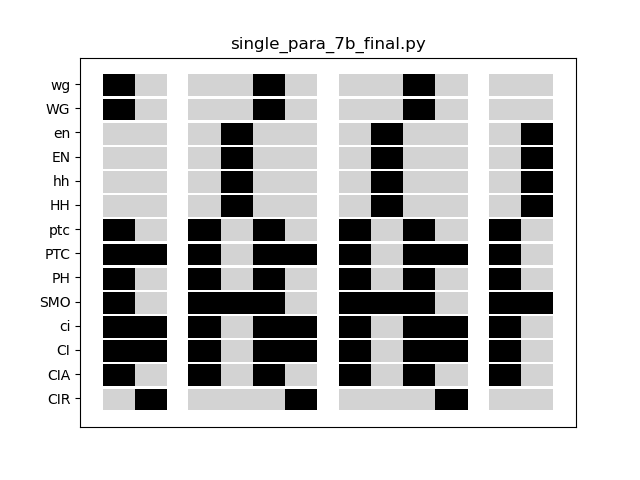


wg:  [0, 0, 1, 0]
WG:  [0, 0, 0, 0]
en:  [1, 0, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 1, 1, 1]
PTC:  [1, 0, 1, 1]
PH:  [0, 0, 0, 0]
SMO:  [0, 0, 0, 0]
ci:  [0, 1, 1, 1]
CI:  [0, 0, 0, 0]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 1 iterations:
wg:  [0, 0, 1, 0]
WG:  [0, 0, 1, 0]
en:  [0, 0, 0, 0]
EN:  [1, 0, 0, 0]
hh:  [0, 0, 0, 0]
HH:  [1, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [1, 0, 1, 1]
PH:  [0, 0, 0, 0]
SMO:  [0, 1, 0, 0]
ci:  [1, 1, 1, 1]
CI:  [0, 1, 1, 1]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 2 iterations:
wg:  [0, 0, 1, 0]
WG:  [0, 0, 1, 0]
en:  [0, 1, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [1, 0, 1, 1]
PH:  [0, 0, 0, 1]
SMO:  [0, 1, 0, 1]
ci:  [0, 1, 1, 1]
CI:  [1, 1, 1, 1]
CIA:  [0, 1, 0, 0]
CIR:  [0, 0, 1, 1]
---------------------------------------------------
After 3 iterations:
wg:  [0, 0, 1

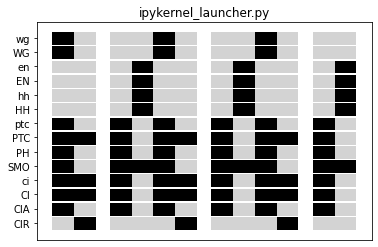

In [ ]:
"""
SOLUTION FOR TASK 7
Initial values are sent to the equations as input. 
Variation added for WG, EN, CI. Changed logic for i-1 and i+1
Before the iteration ends, the calculated values are written over initial values.
In this way, calculated values are initial values for the next iteration.

"""

import matplotlib.pyplot as plt
import sys    
import os    
file_name =  os.path.basename(sys.argv[0])

# Protein name appended by ini is initial state of that protein

slp_ini = [0, 0, 1, 1]
wg_ini = [0, 0, 1, 0]
wingless_ini = [0, 0, 0, 0]
en_ini = [1, 0, 0, 0]
engrailed_ini = [0, 0, 0, 0]
hh_ini = [1, 0, 0, 0]
hedgehog_ini = [0, 0, 0, 0]
ptc_ini = [0, 1, 1, 1]
patched_ini = [1, 0, 1, 1]
ph_ini = [0, 0, 0, 0]
smo_ini = [0, 0, 0, 0]
ci_ini = [0, 1, 1, 1]
cubitus_interruptor_ini = [0, 0, 0, 0]
cia_ini = [0, 0, 0, 0]
cir_ini = [0, 0, 0, 0]

def wg(wg0 = wg_ini, cia0 = cia_ini, cir0 = cir_ini):
    """
    **wg**
    Given:
        wg, CIA, CIR
    Equation to solve: 
        wgi = (CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi]
    """
    
    wg_final = list() #Final Array of wg
    
    #First loop for iteration over parasegmants, second loop for cells in the parasegment
    
    for i, cell_value in enumerate(wg0):
        temp_wg = wg0[i]
        tmp_cia = cia0[i]
        tmp_cir = cir0[i]
        tmp_slp = slp_ini[i]
            
        #If equation is true, add 1 to the parasegmant array of wg, else add 0. 
        #breakdown of equation of wg is below:
        bool1 = tmp_cia and tmp_slp and not tmp_cir
        bool2 = tmp_cia or tmp_slp
        bool3 = temp_wg and bool2 and not tmp_cir
        bool4 = bool1 or bool3
        #if (tmp_cia and tmp_slp and not tmp_cir) or (temp_wg and (tmp_cia or tmp_slp) and not tmp_cir):
        if bool4:
            wg_final.append(1)
        else:
            wg_final.append(0)
    
    return wg_final
    
def wg_eq4(wg0 = wg_ini):
    """
        wg1 = wg1 and not wg2 and not wg4;
        wg2 = wg2 and not wg1 and not wg3;
        wg3 = wg1 or wg3;
        wg4 = wg2 or wg4;
    
    """
    
    wg_final = list() #Final Array of wg
    
    wg_final.clear()
    #Loop for iteration over parasegmants
    wg_final.append(int(wg0[0] and not wg0[1] and not wg0[3]))
    wg_final.append(int(wg0[1] and not wg0[0] and not wg0[2]))
    wg_final.append(int(wg0[0] or wg0[2]))
    wg_final.append(int(wg0[1] or wg0[3]))
            
    return wg_final
    
def wingless(wg0 = wg_ini):
    """
        **WG**
    Given:
        wg
    Equation to solve: 
        WGi = wgi 
    """
    return wg0

def en(wingless0 = wingless_ini):
    """
    **en**
    Given:
        WG
    Equation to solve: 
        eni = (WGi−1 or WGi+1) and not SLPi
        
    For WGi−1 and WGi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    en_final = list()

    for i, cell_value in enumerate(wingless0):
        if i == 0:
            wg_minus1 = wingless0[3]
        else:
            wg_minus1 = wingless0[i-1]
            
        if i == 3:
            wg_plus1 = wingless0[0]
        else:
            wg_plus1 = wingless0[i+1]

        tmp_slp = slp_ini[i]
            
        bool1 = wg_minus1 or wg_plus1
        bool2 = bool1 and not tmp_slp
        #if ((wg_minus1 or wg_plus1) and not tmp_slp):
        if bool2:
            en_final.append(1)
        else:
            en_final.append(0)
    
    return en_final
    
def engrailed(en0 = en_ini):
    """
    **EN**
    Given:
        en
    Equation to solve: 
        ENi = eni
    """
    return en0

def hh(engrailed0 = engrailed_ini, cir0 = cir_ini):
    """
    **hh**
    Given:
        EN, CIR
    Equation to solve: 
        hhi = ENi and not CIRi
    """
    hh_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
            
        bool1 = tmp_en and not tmp_cir
        #if (tmp_en and not tmp_cir):
        if bool1:
            hh_final.append(1)
        else:
            hh_final.append(0)
    
    return hh_final
    
    
def hedgehog(hh0 = hh_ini):
    """
    **HH**
    Given:
        hh
    Equation to solve: 
        HHi = hhi
    """
    return hh0
    
def ptc(engrailed0 = engrailed_ini, cir0 = cir_ini, cia0 = cia_ini):
    """
    **ptc**
    Given:
        CIA, EN, CIR
    Equation to solve: 
        ptci = CIAi and not ENi and not CIRi
    """
    
    ptc_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
        tmp_cia = cia0[i]
            
        bool1 = tmp_cia and not tmp_en and not tmp_cir
        #if (tmp_cia and not tmp_en and not tmp_cir):
        if bool1:
            ptc_final.append(1)
        else:
            ptc_final.append(0)
    
    return ptc_final
    
def ptc_eq4(ptc0 = patched_ini, wg0 = wg_ini):

    """
    PTC1 = (not wg2 and not wg4) or (PTC1 and not wg1 and not wg3)
    PTC2 = (not wg1 and not wg3) or (PTC2 and not wg2 and not wg4)
    PTC3 = 1
    PTC4 = 1
    """
    
    ptc_final = list() #Final Array of wg
    
    #Loop for iteration over parasegmants
    ptc_final.clear()
    bool1 = (not wg0[1] and not wg0[3]) or (ptc0[0] and not wg0[0] and not wg0[2])
    bool2 = (not wg0[0] and not wg0[2]) or (ptc0[1] and not wg0[1] and not wg0[3])
    ptc_final.append(int(bool1))
    ptc_final.append(int(bool2))
    ptc_final.append(1)
    ptc_final.append(1)
    
    return ptc_final
    

    

def patched_protein(ptc0 = ptc_ini, patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PTC**
    Given:
        ptc, PTC, HH
    Equation to solve: 
        PTCi = ptci or (PTCi and not HHi−1 and not HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    patched_final = list()
    
    for i, cell_value in enumerate(ptc0):
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_ptc = ptc0[i]
        tmp_ptc_pt = patched0[i]
            
            
        bool1 = tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1
        bool2 = tmp_ptc or bool1
        #if (tmp_ptc or (tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1)):
        if bool2:
            patched_final.append(1)
        else:
            patched_final.append(0)
    
    return patched_final    
    
def ph(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PH**
    Given:
        PTC, HH
    Equation to solve: 
        PHi(t) = PTCi and (HHi−1 or HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    ph_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_patched = patched0[i]
            
        bool1 = hedgehog_minus1 or hedgehog_plus1
        bool2 = tmp_patched and bool1
        #if (tmp_patched and (hedgehog_minus1 or hedgehog_plus1)):
        if bool2:
            ph_final.append(1)
        else:
            ph_final.append(0)
    
    return ph_final

def smo(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **SMO**
    Given:
        PTC, HH
    Equation to solve: 
        SMOi(t) = not PTCi or HHi−1 or HHi+1
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    smo_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
        
        tmp_patched = patched0[i]
            
        bool1 = not tmp_patched or hedgehog_minus1 or hedgehog_plus1
        #if (not tmp_patched or hedgehog_minus1 or hedgehog_plus1):
        if bool1:
            smo_final.append(1)
        else:
            smo_final.append(0)
    
    return smo_final
    
def ci(engrailed0 = engrailed_ini):
    """
    **ci**
    Given:
        EN
    Equation to solve: 
        cii = not ENi
    """

    ci_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        ci_final.append(int(not engrailed0[i]))
    
    return ci_final
    
def cubitus_interruptor(ci0 = ci_ini):
    """
    **CI**
    Given:
        ci
    Equation to solve: 
        CIi = cii
    """
    return ci0

def cia(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIA**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIAi = CIi and (SMOi or hhi−1 or hhi+1)
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cia_final = list()
    
    for i, cell_value in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_smo or hh_minus1 or hh_plus1
        bool2 = tmp_cubitus and bool1
        #if (not tmp_cubitus and (tmp_smo or hh_minus1 or hh_plus1)):
        if bool2:
            cia_final.append(1)
        else:
            cia_final.append(0)
    
    return cia_final
    
def cir(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIR**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIRi = CIi and not SMOi and not hhi−1 and not hhi+1
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cir_final = list()
    
    for i, segment in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1 
        #if (tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1):
        if bool1:
            cir_final.append(1)
        else:
            cir_final.append(0)
    
    return cir_final

if __name__ == '__main__':

    print("wg: " , wg_ini)
    print("WG: ", wingless_ini)
    print("en: ", en_ini)
    print("EN: ", engrailed_ini)
    print("hh: ", hh_ini)
    print("HH: ", hedgehog_ini)
    print("ptc: ", ptc_ini)
    print("PTC: ", patched_ini)
    print("PH: ", ph_ini)
    print("SMO: ", smo_ini)
    print("ci: ", ci_ini)
    print("CI: ", cubitus_interruptor_ini)
    print("CIA: ", cia_ini)
    print("CIR: ", cir_ini)
    
    wg0 = wg_ini
    wingless0 = wingless_ini
    en0 = en_ini
    engrailed0 = engrailed_ini
    hh0 = hh_ini
    hedgehog0 = hedgehog_ini
    ptc0 = ptc_ini
    patched0 = patched_ini
    ph0 = ph_ini
    smo0 = smo_ini
    ci0 = ci_ini
    cubitus0 = cubitus_interruptor_ini
    cia0 = cia_ini
    cir0 = cir_ini
    
    #Keeping iteration count high to check steady state. If steady for 6, it will be steady for 20 as well.
    for x in range(20):
        #wg1 = wg(wg0, cia0, cir0)
        wg1 = wg_eq4(wg0)
        wingless1 = wingless(wg1)
        en1 = en(wingless0)
        engrailed1 = engrailed(en0)
        hh1 = hh(engrailed0, cir0)
        hedgehog1 = hedgehog(hh0)
        ptc1 = ptc(engrailed0, cir0, cia0)
        #patched1 = patched_protein(ptc0, patched0, hedgehog0) #hedgehog1
        patched1 = ptc_eq4(patched0, wg0)
        ph1 = ph(patched0, hedgehog0) #hedgehog1
        smo1 = smo(patched0, hedgehog0) #hedgehog1
        ci1 = ci(engrailed0)
        cubitus1 = cubitus_interruptor(ci0)
        cia1 = cia(cubitus0, smo0, hh0) #hh1
        cir1 = cir(cubitus0, smo0, hh0) #hh1
        
        wg0 = wg1
        wingless0 = wingless1
        en0 = en1
        engrailed0 = engrailed1
        hh0 = hh1
        hedgehog0 = hedgehog1
        ptc0 = ptc1
        patched0 = patched1
        ph0 = ph1
        smo0 = smo1
        ci0 = ci1
        cubitus0 = cubitus1
        cia0 = cia1
        cir0 = cir1
        
        
        print("---------------------------------------------------")
        print("After", x+1, "iterations:")
        print("wg: " , wg0)
        print("WG: ", wingless0)
        print("en: ", en0)
        print("EN: ", engrailed0)
        print("hh: ", hh0)
        print("HH: ", hedgehog0)
        print("ptc: ", ptc0)
        print("PTC: ", patched0)
        print("PH: ", ph0)
        print("SMO: ", smo0)
        print("ci: ", ci0)
        print("CI: ", cubitus0)
        print("CIA: ", cia0)
        print("CIR: ", cir0)
        
    """
    Figure section:
    """
    
    
    wg_graph = [None] * 12
    wingless_graph = [None] * 12
    en_graph = [None] * 12
    engrailed_graph = [None] * 12
    hh_graph = [None] * 12
    hedgehog_graph = [None] * 12
    ptc_graph = [None] * 12
    patched_graph = [None] * 12
    ph_graph = [None] * 12
    smo_graph = [None] * 12
    ci_graph = [None] * 12
    cubitus_graph = [None] * 12
    cia_graph = [None] * 12
    cir_graph = [None] * 12
    
    bar_graph = [(10,15), (25,15), (50,15), (65,15), (80,15), (95,15), (120,15), (135,15), (150,15), (165,15), (190,15), (205,15)]
    for i, segment in enumerate(wg0):
        if wg0[i] == 1:
            wg_graph[i+2] = 'black'
            wg_graph[i+6] = 'black'
            wg_graph[i-2] = 'black'
        else:
            wg_graph[i+2] = 'lightgrey'
            wg_graph[i+6] = 'lightgrey'
            wg_graph[i-2] = 'lightgrey'
            
        if wingless0[i] == 1:
            wingless_graph[i+2] = 'black'
            wingless_graph[i+6] = 'black'
            wingless_graph[i-2] = 'black'
        else:
            wingless_graph[i+2] = 'lightgrey'
            wingless_graph[i+6] = 'lightgrey'
            wingless_graph[i-2] = 'lightgrey'
        
        if en0[i] == 1:
            en_graph[i+2] = 'black'
            en_graph[i+6] = 'black'
            en_graph[i-2] = 'black'
        else:
            en_graph[i+2] = 'lightgrey'
            en_graph[i+6] = 'lightgrey'
            en_graph[i-2] = 'lightgrey'
        
        if engrailed0[i] == 1:
            engrailed_graph[i+2] = 'black'
            engrailed_graph[i+6] = 'black'
            engrailed_graph[i-2] = 'black'
        else:
            engrailed_graph[i+2] = 'lightgrey'
            engrailed_graph[i+6] = 'lightgrey'
            engrailed_graph[i-2] = 'lightgrey'
        
        if hh0[i] == 1:
            hh_graph[i+2] = 'black'
            hh_graph[i+6] = 'black'
            hh_graph[i-2] = 'black'
        else:
            hh_graph[i+2] = 'lightgrey'
            hh_graph[i+6] = 'lightgrey'
            hh_graph[i-2] = 'lightgrey'
        
        if hedgehog0[i] == 1:
            hedgehog_graph[i+2] = 'black'
            hedgehog_graph[i+6] = 'black'
            hedgehog_graph[i-2] = 'black'
        else:
            hedgehog_graph[i+2] = 'lightgrey'
            hedgehog_graph[i+6] = 'lightgrey'
            hedgehog_graph[i-2] = 'lightgrey'
        
        if ptc0[i] == 1:
            ptc_graph[i+2] = 'black'
            ptc_graph[i+6] = 'black'
            ptc_graph[i-2] = 'black'
        else:
            ptc_graph[i+2] = 'lightgrey'
            ptc_graph[i+6] = 'lightgrey'
            ptc_graph[i-2] = 'lightgrey'
        
        if patched0[i] == 1:
            patched_graph[i+2] = 'black'
            patched_graph[i+6] = 'black'
            patched_graph[i-2] = 'black'
        else:
            patched_graph[i+2] = 'lightgrey'
            patched_graph[i+6] = 'lightgrey'
            patched_graph[i-2] = 'lightgrey'
        
        if ph0[i] == 1:
            ph_graph[i+2] = 'black'
            ph_graph[i+6] = 'black'
            ph_graph[i-2] = 'black'
        else:
            ph_graph[i+2] = 'lightgrey'
            ph_graph[i+6] = 'lightgrey'
            ph_graph[i-2] = 'lightgrey'
        
        if smo0[i] == 1:
            smo_graph[i+2] = 'black'
            smo_graph[i+6] = 'black'
            smo_graph[i-2] = 'black'
        else:
            smo_graph[i+2] = 'lightgrey'
            smo_graph[i+6] = 'lightgrey'
            smo_graph[i-2] = 'lightgrey'
        
        if ci0[i] == 1:
            ci_graph[i+2] = 'black'
            ci_graph[i+6] = 'black'
            ci_graph[i-2] = 'black'
        else:
            ci_graph[i+2] = 'lightgrey'
            ci_graph[i+6] = 'lightgrey'
            ci_graph[i-2] = 'lightgrey'
        
        if cubitus0[i] == 1:
            cubitus_graph[i+2] = 'black'
            cubitus_graph[i+6] = 'black'
            cubitus_graph[i-2] = 'black'
        else:
            cubitus_graph[i+2] = 'lightgrey'
            cubitus_graph[i+6] = 'lightgrey'
            cubitus_graph[i-2] = 'lightgrey'
        
        if cia0[i] == 1:
            cia_graph[i+2] = 'black'
            cia_graph[i+6] = 'black'
            cia_graph[i-2] = 'black'
        else:
            cia_graph[i+2] = 'lightgrey'
            cia_graph[i+6] = 'lightgrey'
            cia_graph[i-2] = 'lightgrey'
        
        if cir0[i] == 1:
            cir_graph[i+2] = 'black'
            cir_graph[i+6] = 'black'
            cir_graph[i-2] = 'black'
        else:
            cir_graph[i+2] = 'lightgrey'
            cir_graph[i+6] = 'lightgrey'
            cir_graph[i-2] = 'lightgrey'
            
    fig , ax= plt.subplots()
    
    ax.broken_barh(bar_graph, (140, 9), facecolors = wg_graph)
    ax.broken_barh(bar_graph, (130, 9), facecolors = wingless_graph)
    ax.broken_barh(bar_graph, (120, 9), facecolors = en_graph)
    ax.broken_barh(bar_graph, (110, 9), facecolors = engrailed_graph)
    ax.broken_barh(bar_graph, (100, 9), facecolors = hh_graph)
    ax.broken_barh(bar_graph, (90, 9), facecolors = hedgehog_graph)
    ax.broken_barh(bar_graph, (80, 9), facecolors = ptc_graph)
    ax.broken_barh(bar_graph, (70, 9), facecolors = patched_graph)
    ax.broken_barh(bar_graph, (60, 9), facecolors = ph_graph)
    ax.broken_barh(bar_graph, (50, 9), facecolors = smo_graph)
    ax.broken_barh(bar_graph, (40, 9), facecolors = ci_graph)
    ax.broken_barh(bar_graph, (30, 9), facecolors = cubitus_graph)
    ax.broken_barh(bar_graph, (20, 9), facecolors = cia_graph)
    ax.broken_barh(bar_graph, (10, 9), facecolors = cir_graph)
    ax.set_yticks([15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145])

    ax.set_yticklabels(['CIR', 'CIA', 'CI', 'ci', 'SMO', 'PH', 'PTC', 'ptc', 'HH', 'hh', 'EN', 'en', 'WG', 'wg'])
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.title(file_name)
    plt.show()

**Task 8**

Obtain an expression of the segment polarity genes after a round of a cell division. This steady-state agrees with the wild-type pattern observed in stage 11 embryos.


**Hint:**
Assume that after a cell-division, each 4 cell wide parasegment becomes 8 cell wide. Each cell divides into two identical cells, with the same gene expressed in each of the two. WG and HH proteins can be transported through the nearest neighbors of the cells expressing their mRNAs, and can interact with their receptors in the membrane of the second neighbors cells. Transport of HH is restricted by the broad PTC domain. 

Expected Output: 

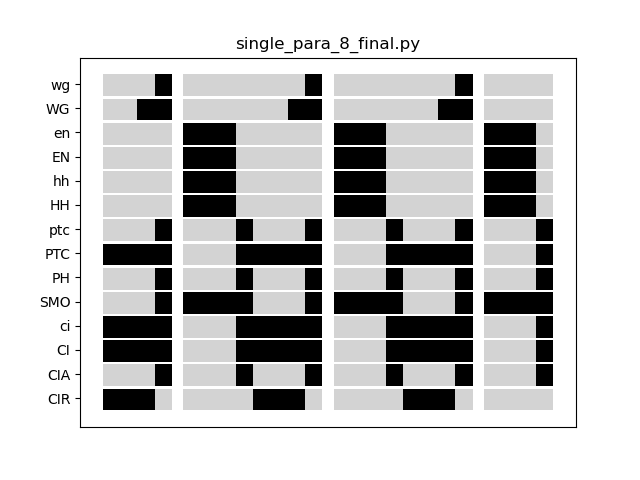

wg:  [0, 0, 0, 0, 0, 0, 1, 1]
WG:  [0, 0, 0, 0, 0, 0, 0, 0]
en:  [1, 1, 0, 0, 0, 0, 0, 0]
EN:  [0, 0, 0, 0, 0, 0, 0, 0]
hh:  [1, 1, 0, 0, 0, 0, 0, 0]
HH:  [0, 0, 0, 0, 0, 0, 0, 0]
ptc:  [0, 0, 1, 1, 1, 1, 1, 1]
PTC:  [0, 0, 1, 1, 1, 1, 1, 1]
PH:  [0, 0, 0, 0, 0, 0, 0, 0]
SMO:  [0, 0, 0, 0, 0, 0, 0, 0]
ci:  [0, 0, 1, 1, 1, 1, 1, 1]
CI:  [0, 0, 0, 0, 0, 0, 0, 0]
CIA:  [0, 0, 0, 0, 0, 0, 0, 0]
CIR:  [0, 0, 0, 0, 0, 0, 0, 0]
---------------------------------------------------
After 1 iterations:
wg:  [0, 0, 0, 0, 0, 0, 1, 1]
WG:  [0, 0, 0, 0, 0, 0, 1, 1]
en:  [0, 0, 0, 0, 0, 0, 0, 0]
EN:  [1, 1, 0, 0, 0, 0, 0, 0]
hh:  [0, 0, 0, 0, 0, 0, 0, 0]
HH:  [1, 1, 1, 0, 0, 0, 0, 0]
ptc:  [0, 0, 0, 0, 0, 0, 0, 0]
PTC:  [0, 0, 1, 1, 1, 1, 1, 1]
PH:  [0, 0, 0, 0, 0, 0, 0, 0]
SMO:  [1, 1, 0, 0, 0, 0, 0, 0]
ci:  [1, 1, 1, 1, 1, 1, 1, 1]
CI:  [0, 0, 1, 1, 1, 1, 1, 1]
CIA:  [0, 0, 0, 0, 0, 0, 0, 0]
CIR:  [0, 0, 0, 0, 0, 0, 0, 0]
---------------------------------------------------
After 2 iterations:
wg:  [

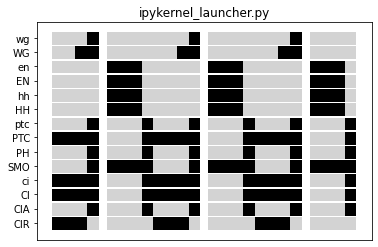

In [ ]:
"""
SOLUTION FOR TASK 8
Initial values are sent to the equations as input. 
Variation added for WG, EN, CI. Changed logic for i-1 and i+1
Before the iteration ends, the calculated values are written over initial values.
In this way, calculated values are initial values for the next iteration.

"""

import matplotlib.pyplot as plt
import sys    
import os    
file_name =  os.path.basename(sys.argv[0])

# Protein name appended by ini is initial state of that protein

slp_ini = [0, 0, 0, 0, 1, 1, 1, 1]
wg_ini = [0, 0, 0, 0, 0, 0, 1, 1]
wingless_ini = [0, 0, 0, 0, 0, 0, 0, 0]
en_ini = [1, 1, 0, 0, 0, 0, 0, 0]
engrailed_ini = [0, 0, 0, 0, 0, 0, 0, 0]
hh_ini = [1, 1, 0, 0, 0, 0, 0, 0]
hedgehog_ini = [0, 0, 0, 0, 0, 0, 0, 0]
ptc_ini = [0, 0, 1, 1, 1, 1, 1, 1]
patched_ini = [0, 0, 1, 1, 1, 1, 1, 1]
ph_ini = [0, 0, 0, 0, 0, 0, 0, 0]
smo_ini = [0, 0, 0, 0, 0, 0, 0, 0]
ci_ini = [0, 0, 1, 1, 1, 1, 1, 1]
cubitus_interruptor_ini = [0, 0, 0, 0, 0, 0, 0, 0]
cia_ini = [0, 0, 0, 0, 0, 0, 0, 0]
cir_ini = [0, 0, 0, 0, 0, 0, 0, 0]

def wg(wg0 = wg_ini, cia0 = cia_ini, cir0 = cir_ini):
    """
    **wg**
    Given:
        wg, CIA, CIR
    Equation to solve: 
        wgi = (CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi]
    """
    
    wg_final = list() #Final Array of wg
    
    #First loop for iteration over parasegmants, second loop for cells in the parasegment
    
    for i, cell_value in enumerate(wg0):
        temp_wg = wg0[i]
        tmp_cia = cia0[i]
        tmp_cir = cir0[i]
        tmp_slp = slp_ini[i]
            
        #If equation is true, add 1 to the parasegmant array of wg, else add 0. 
        #breakdown of equation of wg is below:
        bool1 = tmp_cia and tmp_slp and not tmp_cir
        bool2 = tmp_cia or tmp_slp
        bool3 = temp_wg and bool2 and not tmp_cir
        bool4 = bool1 or bool3
        #if (tmp_cia and tmp_slp and not tmp_cir) or (temp_wg and (tmp_cia or tmp_slp) and not tmp_cir):
        if bool4:
            wg_final.append(1)
        else:
            wg_final.append(0)
    
    return wg_final
    
def wg_eq4(wg0 = wg_ini):
    """
        wg1 = wg1 and not wg2 and not wg4;
        wg2 = wg2 and not wg1 and not wg3;
        wg3 = wg1 or wg3;
        wg4 = wg2 or wg4;
    
    """
    
    wg_final = list() #Final Array of wg
    
    wg_final.clear()
    #Loop for iteration over parasegmants
    wg_final.append(int(wg0[0] and not wg0[1] and not wg0[3]))
    wg_final.append(int(wg0[0] and not wg0[1] and not wg0[3]))
    wg_final.append(int(wg0[1] and not wg0[0] and not wg0[2]))
    wg_final.append(int(wg0[1] and not wg0[0] and not wg0[2]))
    wg_final.append(int(wg0[0] or wg0[2]))
    wg_final.append(int(wg0[0] or wg0[2]))
    wg_final.append(int(wg0[1] or wg0[3]))
    wg_final.append(int(wg0[1] or wg0[3]))
    
    return wg_final
    
def wingless(wg0 = wg_ini):
    """
        **WG **
    Given:
        wg
    Equation to solve: 
        WGi = wgi 
    """
    wingless_final = wg0
    tmp_wg = list()
    
    for i, cell_value in enumerate(wingless_final):
        if i in tmp_wg:
            continue
        
        if wingless_final[i]:
            if i == 7:
                wingless_final[i-1] = 1
            elif i != 6:
                wingless_final[i+1] = 1
                wingless_final[i+2] = 1
                tmp_wg.append(i+1)
                tmp_wg.append(i+2)
            else:
                wingless_final[i+1] = 1
                tmp_wg.append(i+1)
            
    return wingless_final

def en(wingless0 = wingless_ini):
    """
    **en**
    Given:
        WG
    Equation to solve: 
        eni = (WGi−1 or WGi+1) and not SLPi
        
    For WGi−1 and WGi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    en_final = list()

    for i, cell_value in enumerate(wingless0):
        if i == 0:
            wg_minus1 = wingless0[7]
        else:
            wg_minus1 = wingless0[i-1]
            
        if i == 7:
            wg_plus1 = wingless0[0]
        else:
            wg_plus1 = wingless0[i+1]

        tmp_slp = slp_ini[i]
            
        bool1 = wg_minus1 or wg_plus1
        bool2 = bool1 and not tmp_slp
        #if ((wg_minus1 or wg_plus1) and not tmp_slp):
        if bool2:
            en_final.append(1)
        else:
            en_final.append(0)
            
    for i, cell_value in enumerate(en_final):
        if i in tmp_en:
            continue
        
        if en_final[i]:
            if i == 7:
                wingless_final[i-1] = 1
            elif i != 6:
                en_final[i+1] = 1
                en_final[i+2] = 1
                tmp_en.append(i+1)
                tmp_en.append(i+2)
            else:
                en_final[i+1] = 1
                tmp_en.append(i+1)
    return en_final
    
def engrailed(en0 = en_ini):
    """
    **EN**
    Given:
        en
    Equation to solve: 
        ENi = eni
    """
    return en0

def hh(engrailed0 = engrailed_ini, cir0 = cir_ini):
    """
    **hh**
    Given:
        EN, CIR
    Equation to solve: 
        hhi = ENi and not CIRi
    """
    hh_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
            
        bool1 = tmp_en and not tmp_cir
        #if (tmp_en and not tmp_cir):
        if bool1:
            hh_final.append(1)
        else:
            hh_final.append(0)
    
    return hh_final
    
    
def hedgehog(hh0 = hh_ini):
    """
    **HH**
    Given:
        hh
    Equation to solve: 
        HHi = hhi
    """
    hedgehog_final = hh0
    
    for i, cell_value in enumerate(hedgehog_final):
        if i in tmp_hedgehog:
            continue
        
        if hedgehog_final[i]:
            if i == 7:
                hedgehog_final[i-1] = 1
            elif i != 6:
                hedgehog_final[i+1] = 1
                hedgehog_final[i+2] = 1
                tmp_hedgehog.append(i+1)
                tmp_hedgehog.append(i+2)
            else:
                hedgehog_final[i+1] = 1
                tmp_hedgehog.append(i+1)
            
    return hedgehog_final
    
def ptc(engrailed0 = engrailed_ini, cir0 = cir_ini, cia0 = cia_ini):
    """
    **ptc**
    Given:
        CIA, EN, CIR
    Equation to solve: 
        ptci = CIAi and not ENi and not CIRi
    """
    
    ptc_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
        tmp_cia = cia0[i]
            
        bool1 = tmp_cia and not tmp_en and not tmp_cir
        #if (tmp_cia and not tmp_en and not tmp_cir):
        if bool1:
            ptc_final.append(1)
        else:
            ptc_final.append(0)
    
    return ptc_final
    
def ptc_eq4(ptc0 = patched_ini, wg0 = wg_ini):

    """
    PTC1 = (not wg2 and not wg4) or (PTC1 and not wg1 and not wg3)
    PTC2 = (not wg1 and not wg3) or (PTC2 and not wg2 and not wg4)
    PTC3 = 1
    PTC4 = 1
    """
    
    ptc_final = list() #Final Array of wg
    
    #Loop for iteration over parasegmants
    ptc_final.clear()
    bool1 = (not wg0[1] and not wg0[3]) or (ptc0[0] and not wg0[0] and not wg0[2])
    bool1 = (not wg0[1] and not wg0[3]) or (ptc0[0] and not wg0[0] and not wg0[2])
    bool2 = (not wg0[0] and not wg0[2]) or (ptc0[1] and not wg0[1] and not wg0[3])
    bool2 = (not wg0[0] and not wg0[2]) or (ptc0[1] and not wg0[1] and not wg0[3])
    ptc_final.append(int(bool1))
    ptc_final.append(int(bool1))
    ptc_final.append(int(bool2))
    ptc_final.append(int(bool2))
    ptc_final.append(1)
    ptc_final.append(1)
    ptc_final.append(1)
    ptc_final.append(1)
    
    return ptc_final
    

    

def patched_protein(ptc0 = ptc_ini, patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PTC**
    Given:
        ptc, PTC, HH
    Equation to solve: 
        PTCi = ptci or (PTCi and not HHi−1 and not HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    patched_final = list()

    for i, cell_value in enumerate(ptc0):
        if i == 0:
            hedgehog_minus1 = hedgehog0[7]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 7:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_ptc = ptc0[i]
        tmp_ptc_pt = patched0[i]
            
            
        bool1 = tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1
        bool2 = tmp_ptc or bool1
        #if (tmp_ptc or (tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1)):
        if bool2:
            patched_final.append(1)
        else:
            patched_final.append(0)
    
    return patched_final    
    
def ph(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PH**
    Given:
        PTC, HH
    Equation to solve: 
        PHi(t) = PTCi and (HHi−1 or HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    ph_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[7]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 7:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_patched = patched0[i]
            
        bool1 = hedgehog_minus1 or hedgehog_plus1
        bool2 = tmp_patched and bool1
        #if (tmp_patched and (hedgehog_minus1 or hedgehog_plus1)):
        if bool2:
            ph_final.append(1)
        else:
            ph_final.append(0)
    
    return ph_final

def smo(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **SMO**
    Given:
        PTC, HH
    Equation to solve: 
        SMOi(t) = not PTCi or HHi−1 or HHi+1
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    smo_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[7]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 7:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
        
        tmp_patched = patched0[i]
            
        bool1 = not tmp_patched or hedgehog_minus1 or hedgehog_plus1
        #if (not tmp_patched or hedgehog_minus1 or hedgehog_plus1):
        if bool1:
            smo_final.append(1)
        else:
            smo_final.append(0)
    
    return smo_final
    
def ci(engrailed0 = engrailed_ini):
    """
    **ci**
    Given:
        EN
    Equation to solve: 
        cii = not ENi
    """

    ci_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        ci_final.append(int(not engrailed0[i]))
    
    return ci_final
    
def cubitus_interruptor(ci0 = ci_ini):
    """
    **CI**
    Given:
        ci
    Equation to solve: 
        CIi = cii
    """
    return ci0

def cia(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIA**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIAi = CIi and (SMOi or hhi−1 or hhi+1)
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cia_final = list()
    
    for i, cell_value in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[7]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 7:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_smo or hh_minus1 or hh_plus1
        bool2 = tmp_cubitus and bool1
        #if (not tmp_cubitus and (tmp_smo or hh_minus1 or hh_plus1)):
        if bool2:
            cia_final.append(1)
        else:
            cia_final.append(0)
    
    return cia_final
    
def cir(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIR**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIRi = CIi and not SMOi and not hhi−1 and not hhi+1
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cir_final = list()
    
    for i, segment in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[7]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 7:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1 
        #if (tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1):
        if bool1:
            cir_final.append(1)
        else:
            cir_final.append(0)
    
    return cir_final

if __name__ == '__main__':

    print("wg: " , wg_ini)
    print("WG: ", wingless_ini)
    print("en: ", en_ini)
    print("EN: ", engrailed_ini)
    print("hh: ", hh_ini)
    print("HH: ", hedgehog_ini)
    print("ptc: ", ptc_ini)
    print("PTC: ", patched_ini)
    print("PH: ", ph_ini)
    print("SMO: ", smo_ini)
    print("ci: ", ci_ini)
    print("CI: ", cubitus_interruptor_ini)
    print("CIA: ", cia_ini)
    print("CIR: ", cir_ini)
    
    wg0 = wg_ini
    wingless0 = wingless_ini
    en0 = en_ini
    engrailed0 = engrailed_ini
    hh0 = hh_ini
    hedgehog0 = hedgehog_ini
    ptc0 = ptc_ini
    patched0 = patched_ini
    ph0 = ph_ini
    smo0 = smo_ini
    ci0 = ci_ini
    cubitus0 = cubitus_interruptor_ini
    cia0 = cia_ini
    cir0 = cir_ini
    
    #Keeping iteration count high to check steady state. If steady for 6, it will be steady for 20 as well.
    for x in range(20):
        wg1 = wg(wg0, cia0, cir0)
        #wg1 = wg_eq4(wg0)
        wingless1 = wingless(wg0)
        en1 = en(wingless0)
        engrailed1 = engrailed(en0)
        hh1 = hh(engrailed0, cir0)
        hedgehog1 = hedgehog(hh0)
        ptc1 = ptc(engrailed0, cir0, cia0)
        patched1 = patched_protein(ptc0, patched0, hedgehog0) #hedgehog1
        #patched1 = ptc_eq4(patched0, wg0)
        ph1 = ph(patched0, hedgehog0) #hedgehog1
        smo1 = smo(patched0, hedgehog0) #hedgehog1
        ci1 = ci(engrailed0)
        cubitus1 = cubitus_interruptor(ci0)
        cia1 = cia(cubitus0, smo0, hh0) #hh1
        cir1 = cir(cubitus0, smo0, hh0) #hh1
        #print("---\nwg: ", wg1)
        #print("cia: ", cia1)
        #print("cir: ", cir1, "\n---\n")
        
        wg0 = wg1
        wingless0 = wingless1
        en0 = en1
        engrailed0 = engrailed1
        hh0 = hh1
        hedgehog0 = hedgehog1
        ptc0 = ptc1
        patched0 = patched1
        ph0 = ph1
        smo0 = smo1
        ci0 = ci1
        cubitus0 = cubitus1
        cia0 = cia1
        cir0 = cir1
        
        
        print("---------------------------------------------------")
        print("After", x+1, "iterations:")
        print("wg: " , wg0)
        print("WG: ", wingless0)
        print("en: ", en0)
        print("EN: ", engrailed0)
        print("hh: ", hh0)
        print("HH: ", hedgehog0)
        print("ptc: ", ptc0)
        print("PTC: ", patched0)
        print("PH: ", ph0)
        print("SMO: ", smo0)
        print("ci: ", ci0)
        print("CI: ", cubitus0)
        print("CIA: ", cia0)
        print("CIR: ", cir0)
       
    """
    Figure section:
    """
    
    
    wg_graph = [None] * 24
    wingless_graph = [None] * 24
    en_graph = [None] * 24
    engrailed_graph = [None] * 24
    hh_graph = [None] * 24
    hedgehog_graph = [None] * 24
    ptc_graph = [None] * 24
    patched_graph = [None] * 24
    ph_graph = [None] * 24
    smo_graph = [None] * 24
    ci_graph = [None] * 24
    cubitus_graph = [None] * 24
    cia_graph = [None] * 24
    cir_graph = [None] * 24
    
    bar_graph = [(10,15), (25,15), (40,15), (55,15), 
                 (80,15), (95,15), (110,15), (125,15), (140,15), (155,15), (170,15), (185,15),
                 (210,15), (225,15), (240,15), (255,15), (270,15), (285,15), (300,15), (315,15),
                 (340,15), (355,15), (370,15), (385,15)]
    for i, segment in enumerate(wg0):
        if wg0[i] == 1:
            wg_graph[i+4] = 'black'
            wg_graph[i+12] = 'black'
            wg_graph[i-4] = 'black'
        else:
            wg_graph[i+4] = 'lightgrey'
            wg_graph[i+12] = 'lightgrey'
            wg_graph[i-4] = 'lightgrey'
            
        if wingless0[i] == 1:
            wingless_graph[i+4] = 'black'
            wingless_graph[i+12] = 'black'
            wingless_graph[i-4] = 'black'
        else:
            wingless_graph[i+4] = 'lightgrey'
            wingless_graph[i+12] = 'lightgrey'
            wingless_graph[i-4] = 'lightgrey'
        
        if en0[i] == 1:
            en_graph[i+4] = 'black'
            en_graph[i+12] = 'black'
            en_graph[i-4] = 'black'
        else:
            en_graph[i+4] = 'lightgrey'
            en_graph[i+12] = 'lightgrey'
            en_graph[i-4] = 'lightgrey'
        
        if engrailed0[i] == 1:
            engrailed_graph[i+4] = 'black'
            engrailed_graph[i+12] = 'black'
            engrailed_graph[i-4] = 'black'
        else:
            engrailed_graph[i+4] = 'lightgrey'
            engrailed_graph[i+12] = 'lightgrey'
            engrailed_graph[i-4] = 'lightgrey'
        
        if hh0[i] == 1:
            hh_graph[i+4] = 'black'
            hh_graph[i+12] = 'black'
            hh_graph[i-4] = 'black'
        else:
            hh_graph[i+4] = 'lightgrey'
            hh_graph[i+12] = 'lightgrey'
            hh_graph[i-4] = 'lightgrey'
        
        if hedgehog0[i] == 1:
            hedgehog_graph[i+4] = 'black'
            hedgehog_graph[i+12] = 'black'
            hedgehog_graph[i-4] = 'black'
        else:
            hedgehog_graph[i+4] = 'lightgrey'
            hedgehog_graph[i+12] = 'lightgrey'
            hedgehog_graph[i-4] = 'lightgrey'
        
        if ptc0[i] == 1:
            ptc_graph[i+4] = 'black'
            ptc_graph[i+12] = 'black'
            ptc_graph[i-4] = 'black'
        else:
            ptc_graph[i+4] = 'lightgrey'
            ptc_graph[i+12] = 'lightgrey'
            ptc_graph[i-4] = 'lightgrey'
        
        if patched0[i] == 1:
            patched_graph[i+4] = 'black'
            patched_graph[i+12] = 'black'
            patched_graph[i-4] = 'black'
        else:
            patched_graph[i+4] = 'lightgrey'
            patched_graph[i+12] = 'lightgrey'
            patched_graph[i-4] = 'lightgrey'
        
        if ph0[i] == 1:
            ph_graph[i+4] = 'black'
            ph_graph[i+12] = 'black'
            ph_graph[i-4] = 'black'
        else:
            ph_graph[i+4] = 'lightgrey'
            ph_graph[i+12] = 'lightgrey'
            ph_graph[i-4] = 'lightgrey'
        
        if smo0[i] == 1:
            smo_graph[i+4] = 'black'
            smo_graph[i+12] = 'black'
            smo_graph[i-4] = 'black'
        else:
            smo_graph[i+4] = 'lightgrey'
            smo_graph[i+12] = 'lightgrey'
            smo_graph[i-4] = 'lightgrey'
        
        if ci0[i] == 1:
            ci_graph[i+4] = 'black'
            ci_graph[i+12] = 'black'
            ci_graph[i-4] = 'black'
        else:
            ci_graph[i+4] = 'lightgrey'
            ci_graph[i+12] = 'lightgrey'
            ci_graph[i-4] = 'lightgrey'
        
        if cubitus0[i] == 1:
            cubitus_graph[i+4] = 'black'
            cubitus_graph[i+12] = 'black'
            cubitus_graph[i-4] = 'black'
        else:
            cubitus_graph[i+4] = 'lightgrey'
            cubitus_graph[i+12] = 'lightgrey'
            cubitus_graph[i-4] = 'lightgrey'
        
        if cia0[i] == 1:
            cia_graph[i+4] = 'black'
            cia_graph[i+12] = 'black'
            cia_graph[i-4] = 'black'
        else:
            cia_graph[i+4] = 'lightgrey'
            cia_graph[i+12] = 'lightgrey'
            cia_graph[i-4] = 'lightgrey'
        
        if cir0[i] == 1:
            cir_graph[i+4] = 'black'
            cir_graph[i+12] = 'black'
            cir_graph[i-4] = 'black'
        else:
            cir_graph[i+4] = 'lightgrey'
            cir_graph[i+12] = 'lightgrey'
            cir_graph[i-4] = 'lightgrey'
            
    fig , ax= plt.subplots()
    
    ax.broken_barh(bar_graph, (140, 9), facecolors = wg_graph)
    ax.broken_barh(bar_graph, (130, 9), facecolors = wingless_graph)
    ax.broken_barh(bar_graph, (120, 9), facecolors = en_graph)
    ax.broken_barh(bar_graph, (110, 9), facecolors = engrailed_graph)
    ax.broken_barh(bar_graph, (100, 9), facecolors = hh_graph)
    ax.broken_barh(bar_graph, (90, 9), facecolors = hedgehog_graph)
    ax.broken_barh(bar_graph, (80, 9), facecolors = ptc_graph)
    ax.broken_barh(bar_graph, (70, 9), facecolors = patched_graph)
    ax.broken_barh(bar_graph, (60, 9), facecolors = ph_graph)
    ax.broken_barh(bar_graph, (50, 9), facecolors = smo_graph)
    ax.broken_barh(bar_graph, (40, 9), facecolors = ci_graph)
    ax.broken_barh(bar_graph, (30, 9), facecolors = cubitus_graph)
    ax.broken_barh(bar_graph, (20, 9), facecolors = cia_graph)
    ax.broken_barh(bar_graph, (10, 9), facecolors = cir_graph)
    ax.set_yticks([15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145])

    ax.set_yticklabels(['CIR', 'CIA', 'CI', 'ci', 'SMO', 'PH', 'PTC', 'ptc', 'HH', 'hh', 'EN', 'en', 'WG', 'wg'])
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.title(file_name)
    plt.show()
    

wg:  [0, 0, 0, 1]
WG:  [0, 0, 0, 0]
en:  [1, 0, 0, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 1, 1, 1]
PTC:  [0, 0, 0, 0]
PH:  [0, 0, 0, 0]
SMO:  [0, 0, 0, 0]
ci:  [0, 1, 1, 1]
CI:  [0, 0, 0, 0]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 1 iterations:
wg:  [0, 0, 0, 1]
WG:  [0, 0, 0, 1]
en:  [0, 0, 0, 0]
EN:  [1, 0, 0, 0]
hh:  [0, 0, 0, 0]
HH:  [1, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [0, 1, 1, 1]
PH:  [0, 0, 0, 0]
SMO:  [1, 1, 1, 1]
ci:  [1, 1, 1, 1]
CI:  [0, 1, 1, 1]
CIA:  [0, 0, 0, 0]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 2 iterations:
wg:  [0, 0, 0, 1]
WG:  [0, 0, 0, 1]
en:  [1, 0, 1, 0]
EN:  [0, 0, 0, 0]
hh:  [1, 0, 0, 0]
HH:  [0, 0, 0, 0]
ptc:  [0, 0, 0, 0]
PTC:  [0, 1, 1, 1]
PH:  [0, 1, 0, 1]
SMO:  [1, 1, 0, 1]
ci:  [0, 1, 1, 1]
CI:  [1, 1, 1, 1]
CIA:  [0, 1, 1, 1]
CIR:  [0, 0, 0, 0]
---------------------------------------------------
After 3 iterations:
wg:  [0, 0, 0

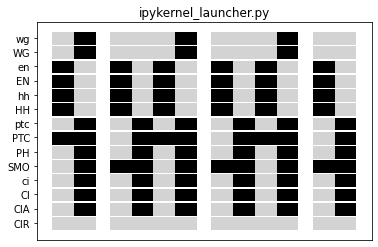

In [ ]:
"""
FIGURE 9 CODE
Initial values are sent to the equations as input. 
Variation added for WG, EN, CI. Changed logic for i-1 and i+1
Before the iteration ends, the calculated values are written over initial values.
In this way, calculated values are initial values for the next iteration.

"""

import matplotlib.pyplot as plt
import sys    
import os    
file_name =  os.path.basename(sys.argv[0])

# Protein name appended by ini is initial state of that protein

#slp_ini = [1, 1, 1, 1]
slp_ini = [0, 0, 0, 0]
wg_ini = [0, 0, 0, 1]
wingless_ini = [0, 0, 0, 0]
en_ini = [1, 0, 0, 0]
engrailed_ini = [0, 0, 0, 0]
hh_ini = [1, 0, 0, 0]
hedgehog_ini = [0, 0, 0, 0]
ptc_ini = [0, 1, 1, 1]
patched_ini = [0, 0, 0, 0]
ph_ini = [0, 0, 0, 0]
smo_ini = [0, 0, 0, 0]
ci_ini = [0, 1, 1, 1]
cubitus_interruptor_ini = [0, 0, 0, 0]
cia_ini = [0, 0, 0, 0]
cir_ini = [0, 0, 0, 0]

def wg(wg0 = wg_ini, cia0 = cia_ini, cir0 = cir_ini):
    """
    **wg**
    Given:
        wg, CIA, CIR
    Equation to solve: 
        wgi = (CIAi and SLPi and not CIRi) or [wgi and (CIAi or SLPi) and not CIRi]
    """
    
    wg_final = list() #Final Array of wg
    
    #First loop for iteration over parasegmants, second loop for cells in the parasegment
    
    for i, cell_value in enumerate(wg0):
        temp_wg = wg0[i]
        tmp_cia = cia0[i]
        tmp_cir = cir0[i]
        tmp_slp = slp_ini[i]
            
        #If equation is true, add 1 to the parasegmant array of wg, else add 0. 
        #breakdown of equation of wg is below:
        bool1 = tmp_cia and tmp_slp and not tmp_cir
        bool2 = tmp_cia or tmp_slp
        bool3 = temp_wg and bool2 and not tmp_cir
        bool4 = bool1 or bool3
        #if (tmp_cia and tmp_slp and not tmp_cir) or (temp_wg and (tmp_cia or tmp_slp) and not tmp_cir):
        if bool4:
            wg_final.append(1)
        else:
            wg_final.append(0)
    
    return wg_final
    
def wg_eq4(wg0 = wg_ini):
    """
        wg1 = wg1 and not wg2 and not wg4;
        wg2 = wg2 and not wg1 and not wg3;
        wg3 = wg1 or wg3;
        wg4 = wg2 or wg4;
    
    """
    
    wg_final = list() #Final Array of wg
    
    wg_final.clear()
    #Loop for iteration over parasegmants
    wg_final.append(int(wg0[0] and not wg0[1] and not wg0[3]))
    wg_final.append(int(wg0[1] and not wg0[0] and not wg0[2]))
    wg_final.append(int(wg0[0] or wg0[2]))
    wg_final.append(int(wg0[1] or wg0[3]))
            
    return wg_final
    
def wingless(wg0 = wg_ini):
    """
        **WG**
    Given:
        wg
    Equation to solve: 
        WGi = wgi 
    """
    return wg0

def en(wingless0 = wingless_ini):
    """
    **en**
    Given:
        WG
    Equation to solve: 
        eni = (WGi−1 or WGi+1) and not SLPi
        
    For WGi−1 and WGi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    en_final = list()

    for i, cell_value in enumerate(wingless0):
        if i == 0:
            wg_minus1 = wingless0[3]
        else:
            wg_minus1 = wingless0[i-1]
            
        if i == 3:
            wg_plus1 = wingless0[0]
        else:
            wg_plus1 = wingless0[i+1]

        tmp_slp = slp_ini[i]
            
        bool1 = wg_minus1 or wg_plus1
        bool2 = bool1 and not tmp_slp
        #if ((wg_minus1 or wg_plus1) and not tmp_slp):
        if bool2:
            en_final.append(1)
        else:
            en_final.append(0)
    
    return en_final
    
def engrailed(en0 = en_ini):
    """
    **EN**
    Given:
        en
    Equation to solve: 
        ENi = eni
    """
    return en0

def hh(engrailed0 = engrailed_ini, cir0 = cir_ini):
    """
    **hh**
    Given:
        EN, CIR
    Equation to solve: 
        hhi = ENi and not CIRi
    """
    hh_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
            
        bool1 = tmp_en and not tmp_cir
        #if (tmp_en and not tmp_cir):
        if bool1:
            hh_final.append(1)
        else:
            hh_final.append(0)
    
    return hh_final
    
    
def hedgehog(hh0 = hh_ini):
    """
    **HH**
    Given:
        hh
    Equation to solve: 
        HHi = hhi
    """
    return hh0
    
def ptc(engrailed0 = engrailed_ini, cir0 = cir_ini, cia0 = cia_ini):
    """
    **ptc**
    Given:
        CIA, EN, CIR
    Equation to solve: 
        ptci = CIAi and not ENi and not CIRi
    """
    
    ptc_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        tmp_en = engrailed0[i]
        tmp_cir = cir0[i]
        tmp_cia = cia0[i]
            
        bool1 = tmp_cia and not tmp_en and not tmp_cir
        #if (tmp_cia and not tmp_en and not tmp_cir):
        if bool1:
            ptc_final.append(1)
        else:
            ptc_final.append(0)
    
    return ptc_final
    
def ptc_eq4(ptc0 = patched_ini, wg0 = wg_ini):

    """
    PTC1 = (not wg2 and not wg4) or (PTC1 and not wg1 and not wg3)
    PTC2 = (not wg1 and not wg3) or (PTC2 and not wg2 and not wg4)
    PTC3 = 1
    PTC4 = 1
    """
    
    ptc_final = list() #Final Array of wg
    
    #Loop for iteration over parasegmants
    ptc_final.clear()
    bool1 = (not wg0[1] and not wg0[3]) or (ptc0[0] and not wg0[0] and not wg0[2])
    bool2 = (not wg0[0] and not wg0[2]) or (ptc0[1] and not wg0[1] and not wg0[3])
    ptc_final.append(int(bool1))
    ptc_final.append(int(bool2))
    ptc_final.append(1)
    ptc_final.append(1)
    
    return ptc_final
    

    

def patched_protein(ptc0 = ptc_ini, patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PTC**
    Given:
        ptc, PTC, HH
    Equation to solve: 
        PTCi = ptci or (PTCi and not HHi−1 and not HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    patched_final = list()
    
    for i, cell_value in enumerate(ptc0):
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_ptc = ptc0[i]
        tmp_ptc_pt = patched0[i]
            
            
        bool1 = tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1
        bool2 = tmp_ptc or bool1
        #if (tmp_ptc or (tmp_ptc_pt and not hedgehog_minus1 and not hedgehog_plus1)):
        if bool2:
            patched_final.append(1)
        else:
            patched_final.append(0)
    
    return patched_final    
    
def ph(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **PH**
    Given:
        PTC, HH
    Equation to solve: 
        PHi(t) = PTCi and (HHi−1 or HHi+1)
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    ph_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
    
        tmp_patched = patched0[i]
            
        bool1 = hedgehog_minus1 or hedgehog_plus1
        bool2 = tmp_patched and bool1
        #if (tmp_patched and (hedgehog_minus1 or hedgehog_plus1)):
        if bool2:
            ph_final.append(1)
        else:
            ph_final.append(0)
    
    return ph_final

def smo(patched0 = patched_ini, hedgehog0 = hedgehog_ini):
    """
    **SMO**
    Given:
        PTC, HH
    Equation to solve: 
        SMOi(t) = not PTCi or HHi−1 or HHi+1
        
    For HHi−1 and HHi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    smo_final = list()
    
    for i, cell_value in enumerate(patched0):
    
        if i == 0:
            hedgehog_minus1 = hedgehog0[3]
        else:
            hedgehog_minus1 = hedgehog0[i-1]
            
        if i == 3:
            hedgehog_plus1 = hedgehog0[0]
        else:
            hedgehog_plus1 = hedgehog0[i+1]
        
        tmp_patched = patched0[i]
            
        bool1 = not tmp_patched or hedgehog_minus1 or hedgehog_plus1
        #if (not tmp_patched or hedgehog_minus1 or hedgehog_plus1):
        if bool1:
            smo_final.append(1)
        else:
            smo_final.append(0)
    
    return smo_final
    
def ci(engrailed0 = engrailed_ini):
    """
    **ci**
    Given:
        EN
    Equation to solve: 
        cii = not ENi
    """

    ci_final = list()
    
    for i, cell_value in enumerate(engrailed0):
        ci_final.append(int(not engrailed0[i]))
    
    return ci_final
    
def cubitus_interruptor(ci0 = ci_ini):
    """
    **CI**
    Given:
        ci
    Equation to solve: 
        CIi = cii
    """
    return ci0

def cia(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIA**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIAi = CIi and (SMOi or hhi−1 or hhi+1)
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cia_final = list()
    
    for i, cell_value in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_smo or hh_minus1 or hh_plus1
        bool2 = tmp_cubitus and bool1
        #if (not tmp_cubitus and (tmp_smo or hh_minus1 or hh_plus1)):
        if bool2:
            cia_final.append(1)
        else:
            cia_final.append(0)
    
    return cia_final
    
def cir(cubitus0 = cubitus_interruptor_ini, smo0 = smo_ini, hh0 = hh_ini):
    """
    **CIR**
    Given:
        CI, SMO, hh
    Equation to solve: 
        CIRi = CIi and not SMOi and not hhi−1 and not hhi+1
        
    For hhi−1 and hhi+1, check if i-1 or i+1 exists. If it does, take that value.
        if it doesn't, take initial cell value for i+1 and last cell value for i-1.
    """
    
    cir_final = list()
    
    for i, segment in enumerate(cubitus0):
    
        if i == 0:
            hh_minus1 = hh0[3]
        else:
            hh_minus1 = hh0[i-1]
            
        if i == 3:
            hh_plus1 = hh0[0]
        else:
            hh_plus1 = hh0[i+1]
            
        tmp_cubitus = cubitus0[i]
        tmp_smo = smo0[i]
           
        bool1 = tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1 
        #if (tmp_cubitus and not tmp_smo and not hh_minus1 and not hh_plus1):
        if bool1:
            cir_final.append(1)
        else:
            cir_final.append(0)
    
    return cir_final

if __name__ == '__main__':

    print("wg: " , wg_ini)
    print("WG: ", wingless_ini)
    print("en: ", en_ini)
    print("EN: ", engrailed_ini)
    print("hh: ", hh_ini)
    print("HH: ", hedgehog_ini)
    print("ptc: ", ptc_ini)
    print("PTC: ", patched_ini)
    print("PH: ", ph_ini)
    print("SMO: ", smo_ini)
    print("ci: ", ci_ini)
    print("CI: ", cubitus_interruptor_ini)
    print("CIA: ", cia_ini)
    print("CIR: ", cir_ini)
    
    wg0 = wg_ini
    wingless0 = wingless_ini
    en0 = en_ini
    engrailed0 = engrailed_ini
    hh0 = hh_ini
    hedgehog0 = hedgehog_ini
    ptc0 = ptc_ini
    patched0 = patched_ini
    ph0 = ph_ini
    smo0 = smo_ini
    ci0 = ci_ini
    cubitus0 = cubitus_interruptor_ini
    cia0 = cia_ini
    cir0 = cir_ini
    
    #Keeping iteration count high to check steady state. If steady for 6, it will be steady for 20 as well.
    for x in range(20):
        #wg1 = wg(wg0, cia0, cir0)
        wg1 = wg_eq4(wg0)
        wingless1 = wingless(wg0)
        en1 = en(wingless0)
        engrailed1 = engrailed(en0)
        hh1 = hh(engrailed0, cir0)
        hedgehog1 = hedgehog(hh0)
        ptc1 = ptc(engrailed0, cir0, cia0)
        #patched1 = patched_protein(ptc0, patched0, hedgehog0) #hedgehog1
        patched1 = ptc_eq4(patched0, wg0)
        ph1 = ph(patched0, hedgehog0) #hedgehog1
        smo1 = smo(patched0, hedgehog0) #hedgehog1
        ci1 = ci(engrailed0)
        cubitus1 = cubitus_interruptor(ci0)
        cia1 = cia(cubitus0, smo0, hh0) #hh1
        cir1 = cir(cubitus0, smo0, hh0) #hh1
        
        wg0 = wg1
        wingless0 = wingless1
        en0 = en1
        engrailed0 = engrailed1
        hh0 = hh1
        hedgehog0 = hedgehog1
        ptc0 = ptc1
        patched0 = patched1
        ph0 = ph1
        smo0 = smo1
        ci0 = ci1
        cubitus0 = cubitus1
        cia0 = cia1
        cir0 = cir1
        
        
        print("---------------------------------------------------")
        print("After", x+1, "iterations:")
        print("wg: " , wg0)
        print("WG: ", wingless0)
        print("en: ", en0)
        print("EN: ", engrailed0)
        print("hh: ", hh0)
        print("HH: ", hedgehog0)
        print("ptc: ", ptc0)
        print("PTC: ", patched0)
        print("PH: ", ph0)
        print("SMO: ", smo0)
        print("ci: ", ci0)
        print("CI: ", cubitus0)
        print("CIA: ", cia0)
        print("CIR: ", cir0)
        
    """
    Figure section:
    """
    
    
    wg_graph = [None] * 12
    wingless_graph = [None] * 12
    en_graph = [None] * 12
    engrailed_graph = [None] * 12
    hh_graph = [None] * 12
    hedgehog_graph = [None] * 12
    ptc_graph = [None] * 12
    patched_graph = [None] * 12
    ph_graph = [None] * 12
    smo_graph = [None] * 12
    ci_graph = [None] * 12
    cubitus_graph = [None] * 12
    cia_graph = [None] * 12
    cir_graph = [None] * 12
    
    bar_graph = [(10,15), (25,15), (50,15), (65,15), (80,15), (95,15), (120,15), (135,15), (150,15), (165,15), (190,15), (205,15)]
    for i, segment in enumerate(wg0):
        if wg0[i] == 1:
            wg_graph[i+2] = 'black'
            wg_graph[i+6] = 'black'
            wg_graph[i-2] = 'black'
        else:
            wg_graph[i+2] = 'lightgrey'
            wg_graph[i+6] = 'lightgrey'
            wg_graph[i-2] = 'lightgrey'
            
        if wingless0[i] == 1:
            wingless_graph[i+2] = 'black'
            wingless_graph[i+6] = 'black'
            wingless_graph[i-2] = 'black'
        else:
            wingless_graph[i+2] = 'lightgrey'
            wingless_graph[i+6] = 'lightgrey'
            wingless_graph[i-2] = 'lightgrey'
        
        if en0[i] == 1:
            en_graph[i+2] = 'black'
            en_graph[i+6] = 'black'
            en_graph[i-2] = 'black'
        else:
            en_graph[i+2] = 'lightgrey'
            en_graph[i+6] = 'lightgrey'
            en_graph[i-2] = 'lightgrey'
        
        if engrailed0[i] == 1:
            engrailed_graph[i+2] = 'black'
            engrailed_graph[i+6] = 'black'
            engrailed_graph[i-2] = 'black'
        else:
            engrailed_graph[i+2] = 'lightgrey'
            engrailed_graph[i+6] = 'lightgrey'
            engrailed_graph[i-2] = 'lightgrey'
        
        if hh0[i] == 1:
            hh_graph[i+2] = 'black'
            hh_graph[i+6] = 'black'
            hh_graph[i-2] = 'black'
        else:
            hh_graph[i+2] = 'lightgrey'
            hh_graph[i+6] = 'lightgrey'
            hh_graph[i-2] = 'lightgrey'
        
        if hedgehog0[i] == 1:
            hedgehog_graph[i+2] = 'black'
            hedgehog_graph[i+6] = 'black'
            hedgehog_graph[i-2] = 'black'
        else:
            hedgehog_graph[i+2] = 'lightgrey'
            hedgehog_graph[i+6] = 'lightgrey'
            hedgehog_graph[i-2] = 'lightgrey'
        
        if ptc0[i] == 1:
            ptc_graph[i+2] = 'black'
            ptc_graph[i+6] = 'black'
            ptc_graph[i-2] = 'black'
        else:
            ptc_graph[i+2] = 'lightgrey'
            ptc_graph[i+6] = 'lightgrey'
            ptc_graph[i-2] = 'lightgrey'
        
        if patched0[i] == 1:
            patched_graph[i+2] = 'black'
            patched_graph[i+6] = 'black'
            patched_graph[i-2] = 'black'
        else:
            patched_graph[i+2] = 'lightgrey'
            patched_graph[i+6] = 'lightgrey'
            patched_graph[i-2] = 'lightgrey'
        
        if ph0[i] == 1:
            ph_graph[i+2] = 'black'
            ph_graph[i+6] = 'black'
            ph_graph[i-2] = 'black'
        else:
            ph_graph[i+2] = 'lightgrey'
            ph_graph[i+6] = 'lightgrey'
            ph_graph[i-2] = 'lightgrey'
        
        if smo0[i] == 1:
            smo_graph[i+2] = 'black'
            smo_graph[i+6] = 'black'
            smo_graph[i-2] = 'black'
        else:
            smo_graph[i+2] = 'lightgrey'
            smo_graph[i+6] = 'lightgrey'
            smo_graph[i-2] = 'lightgrey'
        
        if ci0[i] == 1:
            ci_graph[i+2] = 'black'
            ci_graph[i+6] = 'black'
            ci_graph[i-2] = 'black'
        else:
            ci_graph[i+2] = 'lightgrey'
            ci_graph[i+6] = 'lightgrey'
            ci_graph[i-2] = 'lightgrey'
        
        if cubitus0[i] == 1:
            cubitus_graph[i+2] = 'black'
            cubitus_graph[i+6] = 'black'
            cubitus_graph[i-2] = 'black'
        else:
            cubitus_graph[i+2] = 'lightgrey'
            cubitus_graph[i+6] = 'lightgrey'
            cubitus_graph[i-2] = 'lightgrey'
        
        if cia0[i] == 1:
            cia_graph[i+2] = 'black'
            cia_graph[i+6] = 'black'
            cia_graph[i-2] = 'black'
        else:
            cia_graph[i+2] = 'lightgrey'
            cia_graph[i+6] = 'lightgrey'
            cia_graph[i-2] = 'lightgrey'
        
        if cir0[i] == 1:
            cir_graph[i+2] = 'black'
            cir_graph[i+6] = 'black'
            cir_graph[i-2] = 'black'
        else:
            cir_graph[i+2] = 'lightgrey'
            cir_graph[i+6] = 'lightgrey'
            cir_graph[i-2] = 'lightgrey'
            
    fig , ax= plt.subplots()
    
    ax.broken_barh(bar_graph, (140, 9), facecolors = wg_graph)
    ax.broken_barh(bar_graph, (130, 9), facecolors = wingless_graph)
    ax.broken_barh(bar_graph, (120, 9), facecolors = en_graph)
    ax.broken_barh(bar_graph, (110, 9), facecolors = engrailed_graph)
    ax.broken_barh(bar_graph, (100, 9), facecolors = hh_graph)
    ax.broken_barh(bar_graph, (90, 9), facecolors = hedgehog_graph)
    ax.broken_barh(bar_graph, (80, 9), facecolors = ptc_graph)
    ax.broken_barh(bar_graph, (70, 9), facecolors = patched_graph)
    ax.broken_barh(bar_graph, (60, 9), facecolors = ph_graph)
    ax.broken_barh(bar_graph, (50, 9), facecolors = smo_graph)
    ax.broken_barh(bar_graph, (40, 9), facecolors = ci_graph)
    ax.broken_barh(bar_graph, (30, 9), facecolors = cubitus_graph)
    ax.broken_barh(bar_graph, (20, 9), facecolors = cia_graph)
    ax.broken_barh(bar_graph, (10, 9), facecolors = cir_graph)
    ax.set_yticks([15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145])

    ax.set_yticklabels(['CIR', 'CIA', 'CI', 'ci', 'SMO', 'PH', 'PTC', 'ptc', 'HH', 'hh', 'EN', 'en', 'WG', 'wg'])
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.title(file_name)
    plt.show()

**Conclusion:** 

This model predicts 10 stable states for the gene network, out of which 6 stable states are observed experimentally. This notebook leads user to predict thses 6 stable states through different tasks provided in the notebook.  

This model could serve as a basis for the application of boolean python in different set of gene networks to uderstand the topology of the network and qualitative expression patterns.

**References:**

[1]	L. Mendoza, D. Thieffry, and E. R. Alvarez-Buylla, “Genetic control of flower morphogenesis in Arabidopsis thaliana: A logical analysis,” in Bioinformatics, 1999.

[2]	J. W. Bodnar, “Programming the Drosophila embryo,” J. Theor. Biol., 1997.

[3]	J. W. Bodnar and M. K. Bradley, “Programming the Drosophila embryo 2: From genotype to phenotype,” Cell Biochemistry and Biophysics. 2001.

[4]	L. Sánchez and D. Thieffry, “A logical analysis of the Drosophila gap-gene system,” J. Theor. Biol., 2001.

[5]	G. Von Dassow, E. Meir, E. M. Munro, and G. M. Odell, “The segment polarity network is a robust developmental module,” Nature, 2000.

[6]	V. V. Gursky, J. Reinitz, and A. M. Samsonov, “How gap genes make their domains: An analytical study based on data driven approximations,” Chaos. 2001.

[7]	J. Reinitz and D. H. Sharp, “Mechanism of eve stripe formation,” Mech. Dev., 1995.

[8]	G. Von Dassow and G. M. Odell, “Design and constraints of the Drosophila segment polarity module: Robust spatial patterning emerges from intertwined cell state switches,” J. Exp. Zool., 2002.

[9]	R. Albert and H. G. Othmer, “The topology of the regulatory interactions predicts the expression pattern of the segment polarity genes in Drosophila melanogaster,” Journal of Theoretical Biology. 2003.

[10]	U. Grossniklaus, R. K. Pearson, and W. J. Gehring, “The Drosophila sloppy paired locus encodes two proteins involved in segmentation that show homology to mammalian transcription factors,” Genes Dev., 1992.

[11]	S. Pfeiffer and J. P. Vincent, “Signalling at a distance: Transport of Wingless in the embryonic epidermis of Drosophila,” Semin. Cell Dev. Biol., 1999.

[12]	K. M. Cadigan and R. Nusse, “Wnt signaling: A common theme in animal development,” Genes and Development. 1997.

[13]	T. Tabata, S. Eaton, and T. B. Kornberg, “The Drosophila hedgehog gene is expressed specifically in posterior compartment cells and is a target of engrailed regulation,” Genes Dev., 1992.

[14]	K. Han and J. L. Manley, “Functional domains of the drosophila engrailed protein,” EMBO J., 1993.

[15]	S. Eaton and T. B. Kornberg, “Repression of ci-D in posterior compartments of Drosophila by engrailed,” Genes Dev., 1990.

[16]	A. M. Taylor, Y. Nakano, J. Mohler, and P. W. Ingham, “Contrasting distributions of patched and hedgehog proteins in the Drosophila embryo,” Mech. Dev., 1993.

[17]	P. W. Ingham, “Hedgehog signalling: How cholesterol modulates the signal,” Current Biology. 2000.

[18]	P. W. Ingham and A. P. McMahon, “Hedgehog signaling in animal development: Paradigms and principles,” Genes and Development. 2001.

[19]	M. Van den Heuvel and P. W. Ingham, “Smoothened encodes a receptor-like serpentine protein required for hedgehog signalling,” Nature, 1996.

[20]	P. W. Ingham, “Transducing Hedgehog: The story so far,” EMBO Journal. 1998.

[21]	C. Alexandre, A. Jacinto, and P. W. Ingham, “Transcriptional activation of hedgehog target genes in Drosophila is mediated directly by the Cubitus interruptus protein, a member of the GLI family of zinc finger DNA-binding proteins,” Genes Dev., 1996.

[22]	M. A. Lefers, Q. T. Wang, and R. A. Holmgren, “Genetic dissection of the Drosophila Cubitus interruptus signaling complex,” Dev. Biol., 2001.

[23]	P. Aza-Blanc and T. B. Kornberg, “Ci: A complex transducer of the Hedgehog signal,” Trends in Genetics. 1999.

[24]	N. Méthot and K. Basler, “Hedgehog controls limb development by regulating the activities of distinct transcriptional activator and repressor forms of cubitus interruptus,” Cell, 1999.

